# INM427 Neural Computing
#### Individual Project - Yumi Heo (Msc Data Science / 230003122)
## A Comparison of Multilayer Perceptrons and Support Vector Machines for Bank Churn Prediction
### Model training, tuning and selection

### 1. Data Processing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import random
import time
import warnings
# Set warnings ingored
warnings.filterwarnings('ignore')

In [2]:
# Generate random numbers
random.seed(42)

---
This dataset is the same as the one used in groupwork, and the data analysis flow, code and explanation provided below are largely consistent with the code used in groupwork.

---

### 1.1. Initial data analysis

<span style="color:red">From here on, it is the same as the analysis code and explanation used in groupwork.</span>

In [3]:
# The dataset used for this project is the same one that was used for the group work
# Similarly to how the dataset was used in the group work, only the training set is used for this project.
# As the test set does not have the target data (the column named 'Exited') due to the competition,
# it is unnecessary to use that dataset for this case.
# The name of the training set has been changed to 'bank_churn_data.csv'.

# Read the dataset
df = pd.read_csv('bank_churn_data.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [4]:
# Check the data type
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# Check for any null data
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check the number of unique values in the target (the column 'Exited')
df['Exited'].nunique()

2

In [7]:
# Check the number of unique values in 'Gender' and 'Geography'.
print(df['Gender'].nunique())
print(df['Geography'].nunique())

2
3


In [8]:
# Remove irrelevant features in the dataset for a model
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [9]:
# Change the string to numeric types(integer) for 'Gender'
map_dict = {'Female' : 0, 'Male' : 1}
df['Gender'] = df['Gender'].map(map_dict).astype(int)

In [10]:
# Check whether the change has been applied and count the number
df['Gender'].value_counts()

1    93150
0    71884
Name: Gender, dtype: int64

In [11]:
# Check which countries are listed under 'Geography' and count the number
df['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [12]:
# Change the string to numeric types(integer) for 'Geography'
map_dict = {'France' : 0, 'Spain' : 1, 'Germany' : 2}
df['Geography'] = df['Geography'].map(map_dict).astype(int)

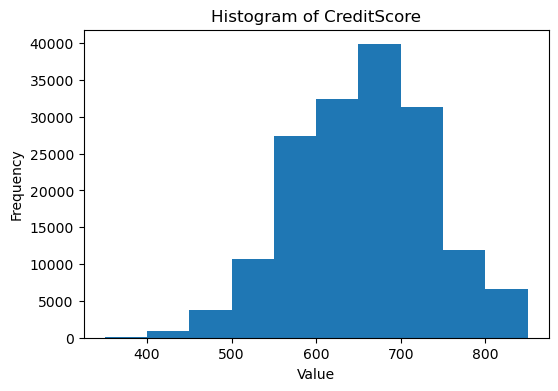

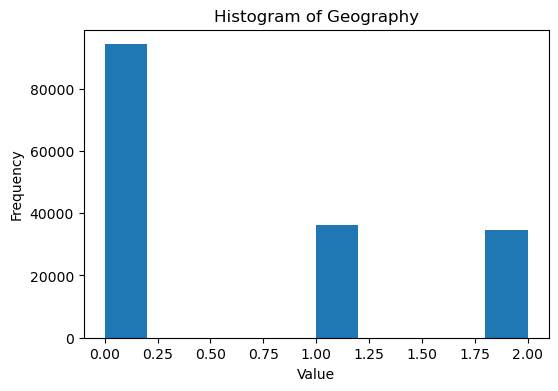

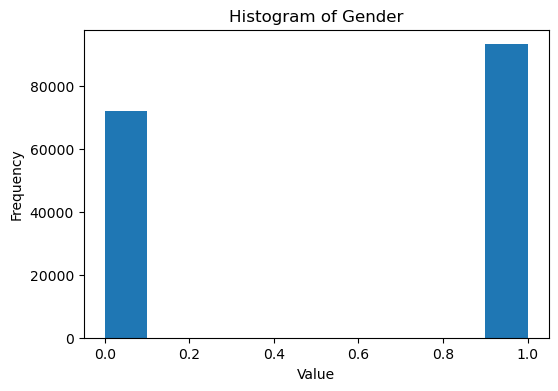

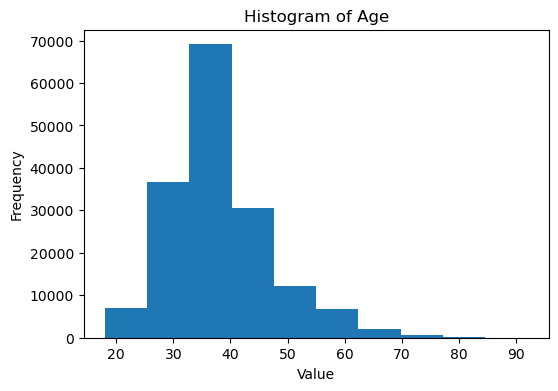

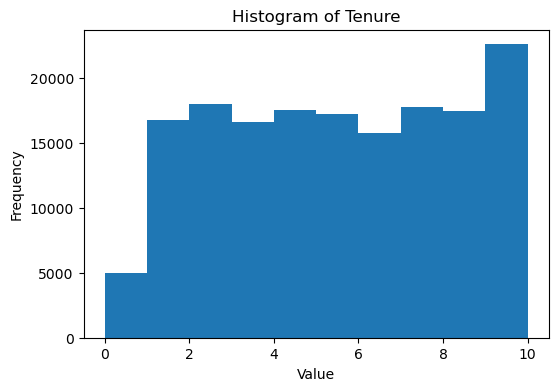

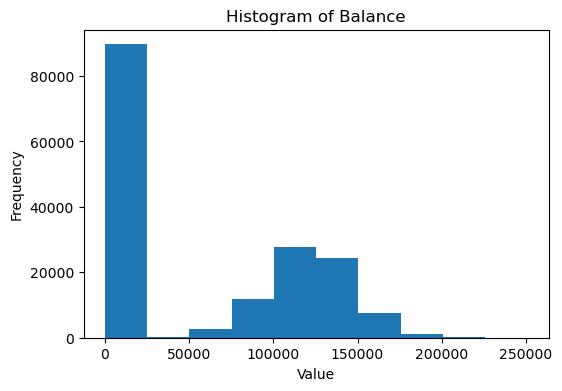

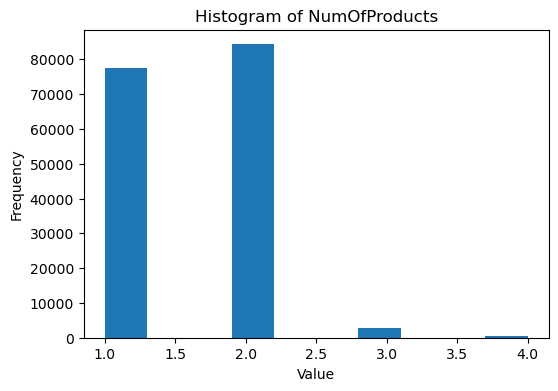

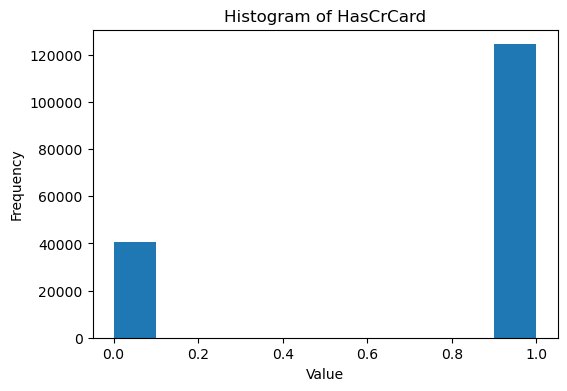

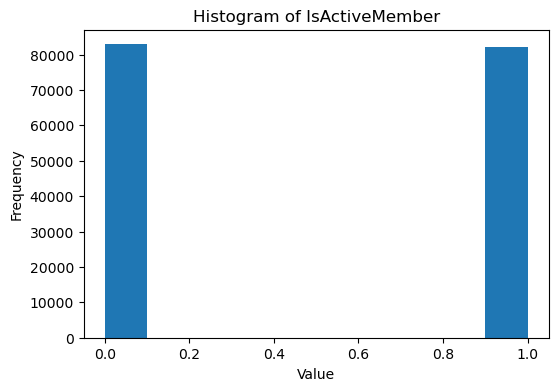

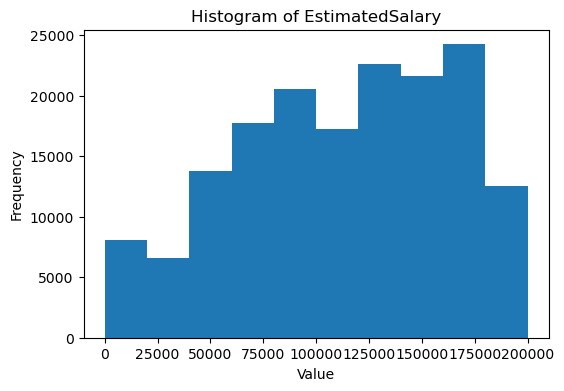

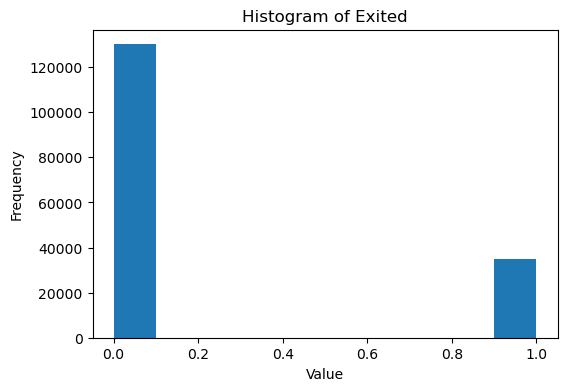

In [13]:
# Check the distribution in each feature
# The code below is from a part of the group work related to data processing
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [14]:
# Check the number of unique values in 'Balance'
df['Balance'].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

---
There is a large proportion of '0' in 'Balance'. It should be examined whether to remove the data with '0' in 'Balance' or not, as this data might affect the sensitivity of the class distribution.

---

In [15]:
# Conduct basic statistical analysis on the 'Balance'
df['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

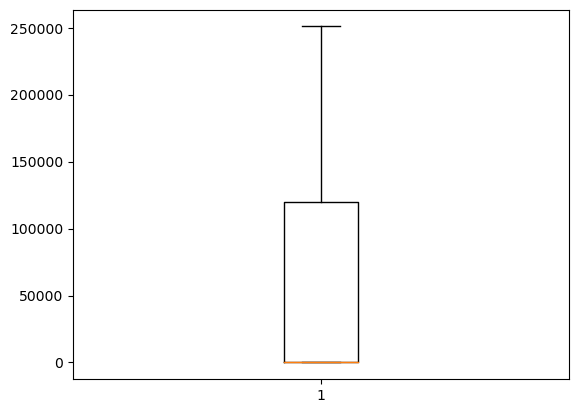

In [16]:
# Check the distribution of 'Balance' using a boxplot
plt.boxplot(df['Balance']);

---
The percentage of data that is 0 is large since the minimum, first quartile and second quartile are all 0.

---

In [17]:
# Check the distribution of the other features and 'Exited'(target) when the balance is 0.
# Select the data with 0 in 'Balance'.
df_0_balance = df[df['Balance'] == 0]
df_0_balance

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1,0,181449.97,0
1,627,0,1,33.0,1,0.0,2,1,1,49503.50,0
2,678,0,1,40.0,10,0.0,2,1,0,184866.69,0
4,716,1,1,33.0,5,0.0,2,1,1,15068.83,0
8,676,0,1,43.0,4,0.0,2,1,0,142917.13,0
...,...,...,...,...,...,...,...,...,...,...,...
165028,630,0,1,50.0,8,0.0,2,1,1,5962.50,0
165029,667,1,0,33.0,2,0.0,1,1,1,131834.75,0
165030,792,0,1,35.0,3,0.0,1,0,0,131834.45,0
165031,565,0,1,31.0,5,0.0,1,1,1,127429.56,0


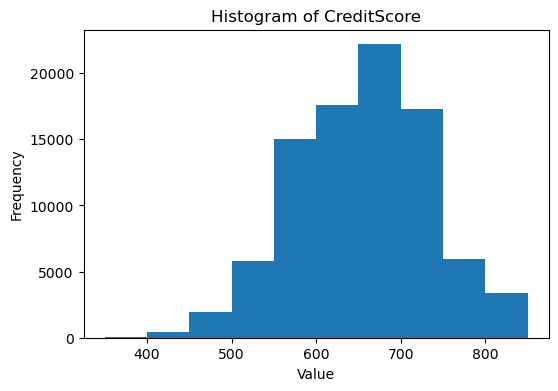

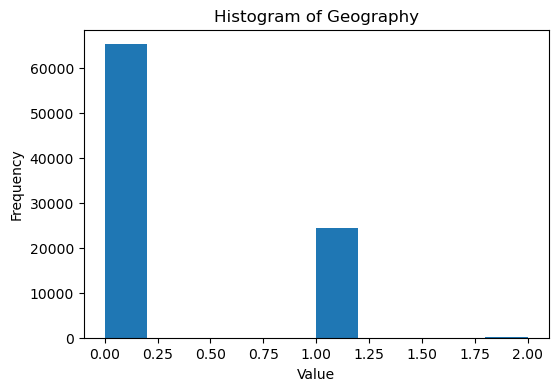

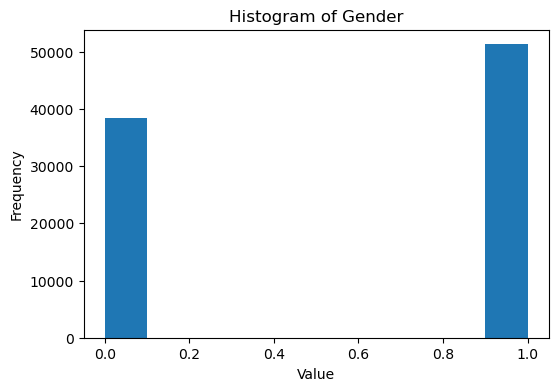

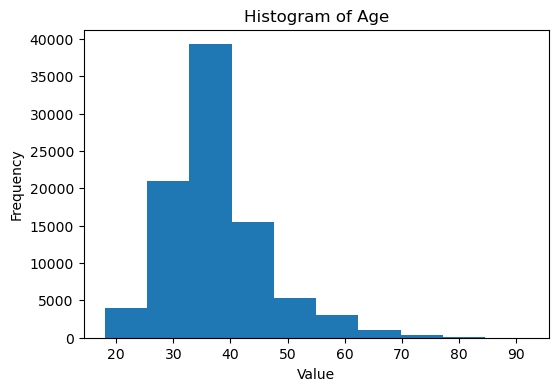

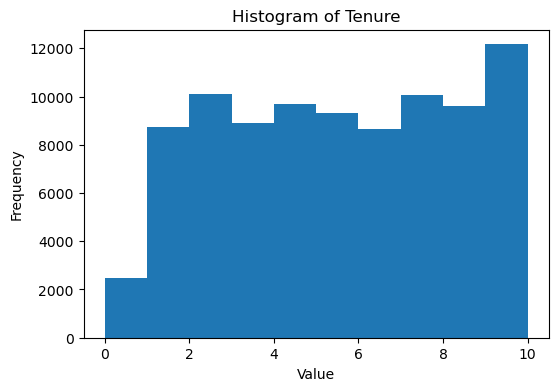

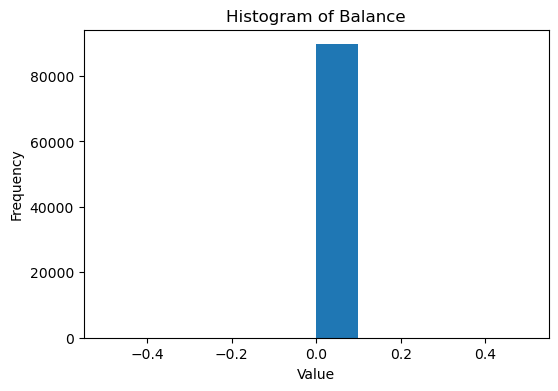

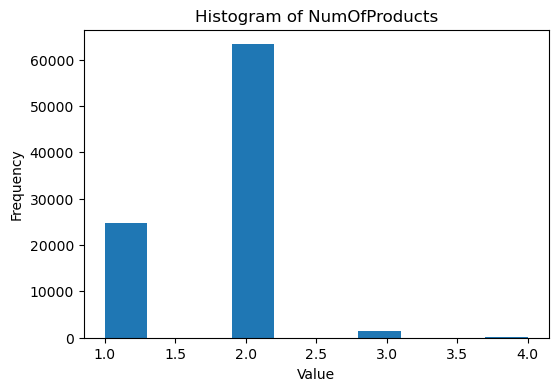

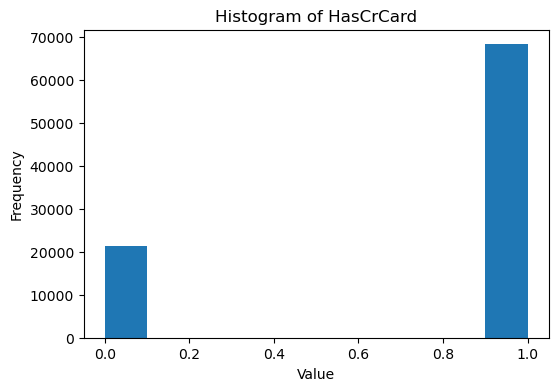

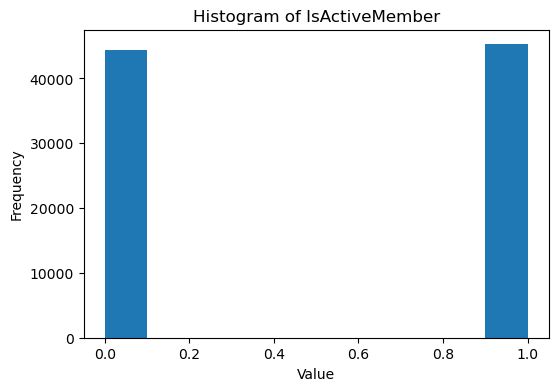

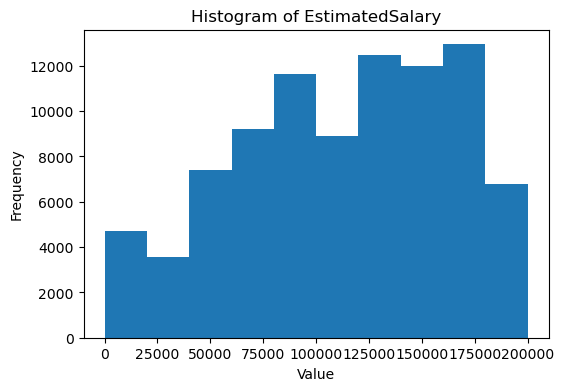

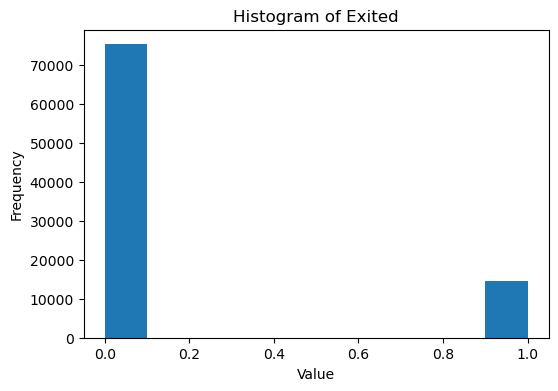

In [18]:
# Check each distribution of the features in 'df_0_balance'.
# The code below is from a part of the group work related to data processing
for column in df_0_balance.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_0_balance[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# Check the distribution of the other features and 'Exited'(target) when the balance is not 0.
# Select the data without 0 in 'Balance'.
df_no0_balance = df[df['Balance'] != 0]
df_no0_balance

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,581,0,1,34.0,2,148882.54,1,1,1,84560.88,0
5,588,2,1,36.0,4,131778.58,1,1,0,136024.31,1
6,593,0,0,30.0,8,144772.69,1,1,0,29792.11,0
7,678,1,1,37.0,1,138476.41,1,1,0,106851.60,0
9,583,2,1,40.0,4,81274.33,1,1,1,170843.07,0
...,...,...,...,...,...,...,...,...,...,...,...
165020,679,0,1,32.0,8,145974.79,1,1,0,138875.86,0
165024,592,2,0,33.0,3,110993.29,2,1,1,176747.66,1
165026,724,2,1,59.0,2,68999.66,1,1,1,66879.27,0
165027,767,0,0,44.0,4,76554.06,2,1,0,77837.63,0


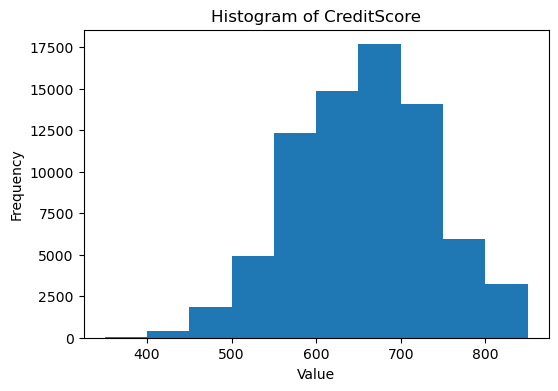

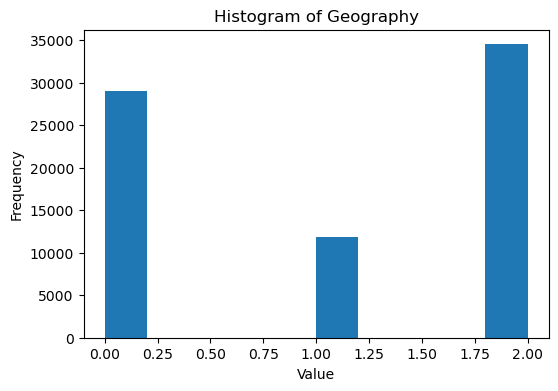

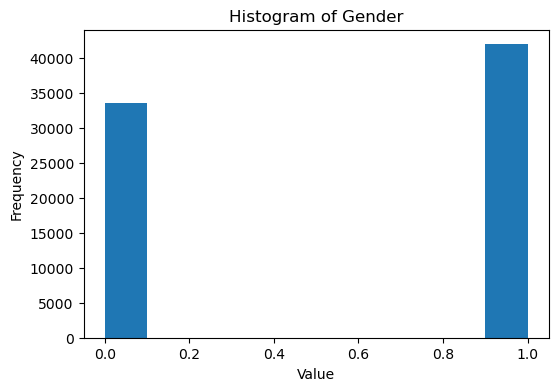

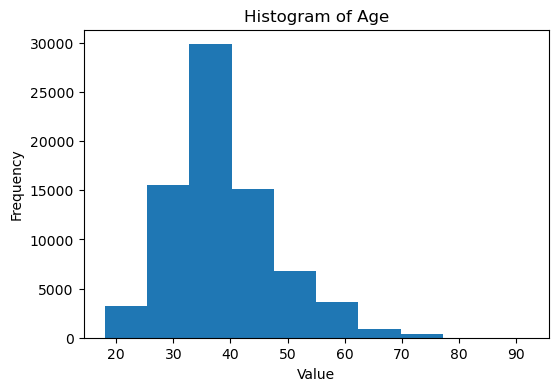

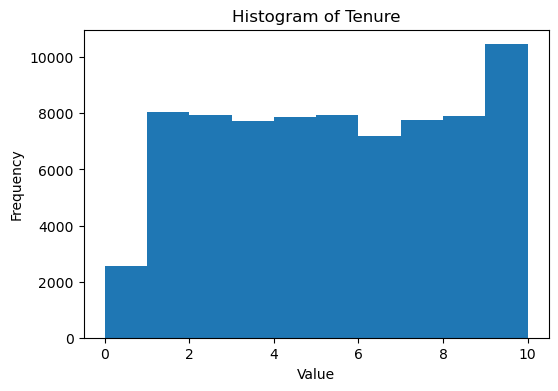

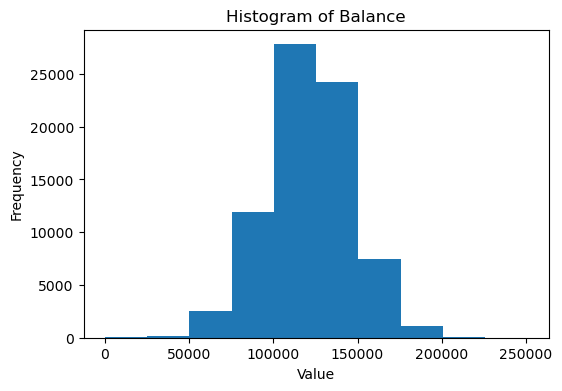

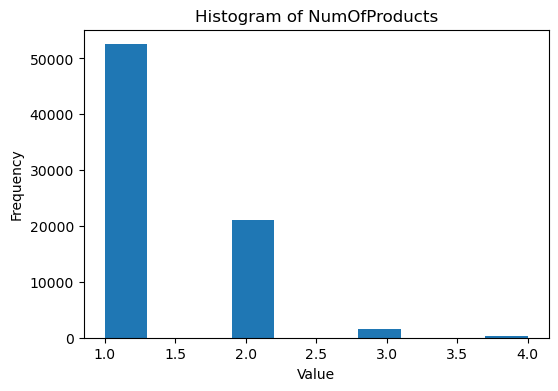

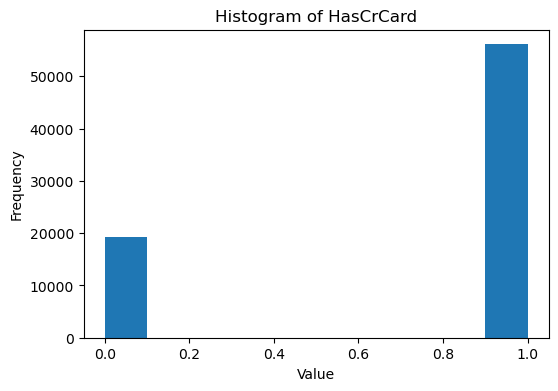

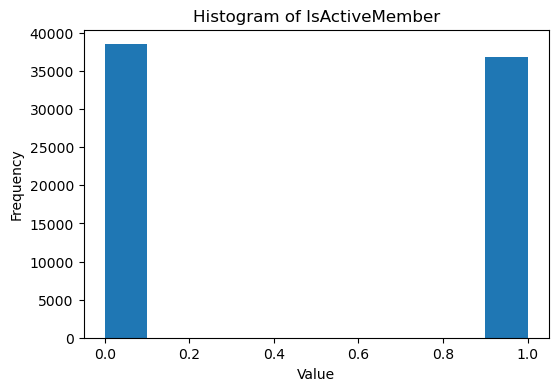

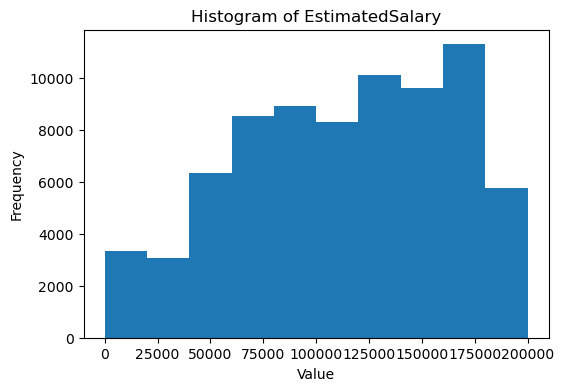

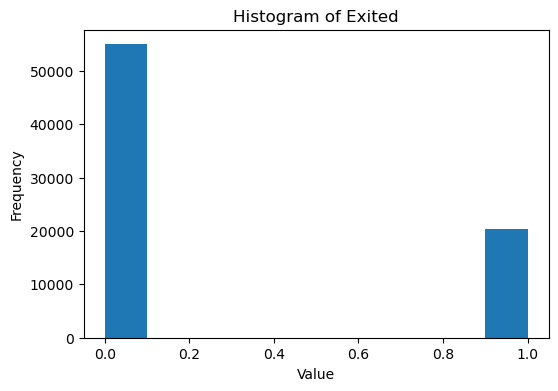

In [20]:
# Check each distribution of the features in 'df_no0_balance'.
# The code below is from a part of the group work related to data processing
for column in df_0_balance.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_no0_balance[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Exited (Without 0 in Balance)')

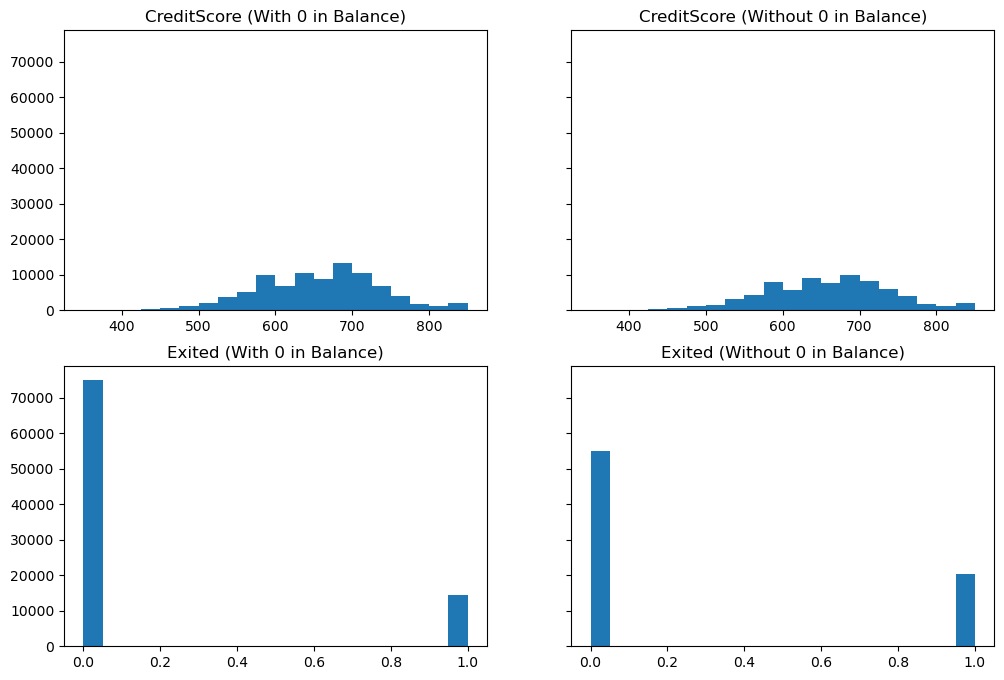

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axs[0, 0].hist(df_0_balance['CreditScore'], bins=20)
axs[0, 0].set_title('CreditScore (With 0 in Balance)')

axs[0, 1].hist(df_no0_balance['CreditScore'], bins=20)
axs[0, 1].set_title('CreditScore (Without 0 in Balance)')

axs[1, 0].hist(df_0_balance['Exited'], bins=20)
axs[1, 0].set_title('Exited (With 0 in Balance)')

axs[1, 1].hist(df_no0_balance['Exited'], bins=20)
axs[1, 1].set_title('Exited (Without 0 in Balance)')

---
both datasets have a similar distribution, it implies that the dataset with 0 in 'Balance is not significantly different from the dataset without 0 in 'Balance' in terms of its impact on the target.

Therefore, the data with the value of 0 in 'Balance' will be remained.

---

<Axes: >

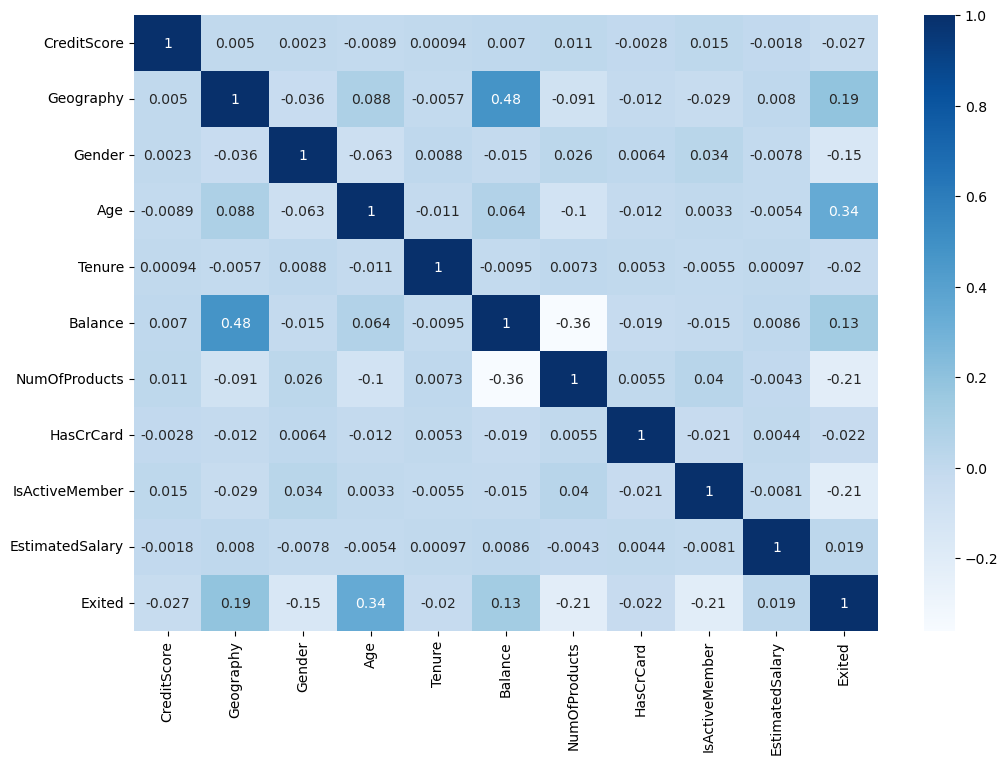

In [22]:
# Check the correlation coefficient of the original dataset
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)

---
When checking the correlation coefficient, there are no feature relationships that show a high correlation coefficient, so the currently existing features will be used in the model as is.

---

<span style="color:red">Up to this point, the analysis code and explanation will be the same as that used in groupwork.</span>

### 2. Split the dataset into features and the target

<span style="color:red">From here on, the code is almost similar to the code used in the groupwork for data splitting.</span>

In [23]:
# This code is delivered from the groupwork.
# Split the dataset to make X(features) and y(target)
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
print(X)
print(y)

        CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       1  33.0       3       0.00   
1               627          0       1  33.0       1       0.00   
2               678          0       1  40.0      10       0.00   
3               581          0       1  34.0       2  148882.54   
4               716          1       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          1       0  33.0       2       0.00   
165030          792          0       1  35.0       3       0.00   
165031          565          0       1  31.0       5       0.00   
165032          554          1       0  30.0       7  161533.00   
165033          850          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                   2          1               0        181449.97  
1                   2          1               1         49

In [24]:
# Check the type of the values in variables and the dimension
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(165034, 10)
(165034,)


In [25]:
# Convert Pandas to Numpy array
X = X.values
y = y.values

# Check the type of the values in variables and the dimension
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(165034, 10)
(165034,)


### 2.1. Convert the features and target to Tensor for the MLP model

In [26]:
# Convert Numpy array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Check the type of the values in variables and the dimension
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([165034, 10])
torch.Size([165034])


In [27]:
# Add a dimension to y to make its dimensions the same as X
y = y.unsqueeze(1)

# Check the data type, dimension, and the class type of X and y
print(X.dtype, X.shape, type(X))
print(y.dtype, y.shape, type(y))

torch.float32 torch.Size([165034, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([165034, 1]) <class 'torch.Tensor'>


In [28]:
# Import libraries to split the data
from sklearn.model_selection import train_test_split

# Split the data into training and test sets before applying stratified k-fold cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check each dimension
print("Training set:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTest set:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set:
X_train: torch.Size([132027, 10])
y_train: torch.Size([132027, 1])

Test set:
X_test: torch.Size([33007, 10])
y_test: torch.Size([33007, 1])


### 2.2. Convert the features and target to Numpy arrays for the SVM model

In [29]:
# Convert PyTorch tensors to NumPy arrays
X_numpy = X.numpy()
y_numpy = y.numpy()
X_train_numpy = X_train.numpy()
y_train_numpy = y_train.numpy()
X_test_numpy = X_test.numpy()
y_test_numpy = y_test.numpy()

In [30]:
print("X_numpy:", X_numpy.shape)
print("y_numpy:", y_numpy.shape)
print("X_train_numpy:", X_train_numpy.shape)
print("y_train_numpy:", y_train_numpy.shape)
print("X_test_numpy:", X_test_numpy.shape)
print("y_test_numpy:", y_test_numpy.shape)

X_numpy: (165034, 10)
y_numpy: (165034, 1)
X_train_numpy: (132027, 10)
y_train_numpy: (132027, 1)
X_test_numpy: (33007, 10)
y_test_numpy: (33007, 1)


<span style="color:red">Up to this point, the code and comment will be the same as the that used in groupwork.</span>

### 2.3. Use the repeated stratified K-Fold cross-validation

In [31]:
# Import repeated stratified K-Fold cross-validator since the target is imbalanced
from sklearn.model_selection import RepeatedStratifiedKFold

In [32]:
# Set the number of K
k_folds = 3 # Random number

In [33]:
# Set the validator and make sure shuffling occurs, which means samples within each split will be randomly shuffled
kfold = RepeatedStratifiedKFold(n_splits=k_folds, n_repeats=2, random_state=42)

### 3. Multilayer Perceptrons(MLP) Model

### 3.1 Define the baseline MLP model (a single hidden layer)

<span style="color:red">The structure of a single hidden layer MLP model is the same as that in the groupwork.</span>

In [34]:
# 1 hidden layer
# The code below is from a part of the group work
class hidden_1_MLP_model(nn.Module):
    def __init__(self, input_size, hidden_unit, output_size):
        super(hidden_1_MLP_model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_unit)
        self.fc2 = nn.Linear(hidden_unit, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        output_layer1 = self.fc1(x)
        layer1_activated = self.relu(output_layer1)
        output_layer2 = self.fc2(layer1_activated)
        output_activated = self.sigmoid(output_layer2)
        return output_activated

In [35]:
# Define the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_unit = 6 #random number
# Hidden Unit Reference: https://www.heatonresearch.com/2017/06/01/hidden-layers.html

### 3.2 Use batches

In [36]:
# Import the library to use the batch for training and validation
from torch.utils.data import TensorDataset, DataLoader

# Set the batch size
batch_size = 64 # Random number

# Convert the datasets into TensorDatasets
# Training and validation sets will change to TensorDatasets during training and validation
test_dataset = TensorDataset(X_test, y_test)

# Apply DataLoader only for the test set
# Training and validation sets will use DataLoader during training and validation
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### 3.3 Train the baseline MLP model

In [37]:
# Set the number of epochs
number_of_epochs = 50 # Random number

In [38]:
# Set the baseline of MLP model, loss function and optimizer
baseline_mlp_model = hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(baseline_mlp_model.parameters(), lr=0.001) # The learning rate is set to the default value

In [39]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        baseline_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = baseline_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        baseline_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = baseline_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/50], Train Loss: 0.4805
Epoch [1/50], Validation Loss: 0.4265
Epoch [2/50], Train Loss: 0.4146
Epoch [2/50], Validation Loss: 0.3994
Epoch [3/50], Train Loss: 0.3962
Epoch [3/50], Validation Loss: 0.3871
Epoch [4/50], Train Loss: 0.3828
Epoch [4/50], Validation Loss: 0.3689
Epoch [5/50], Train Loss: 0.3637
Epoch [5/50], Validation Loss: 0.3548
Epoch [6/50], Train Loss: 0.3513
Epoch [6/50], Validation Loss: 0.3438
Epoch [7/50], Train Loss: 0.3453
Epoch [7/50], Validation Loss: 0.3405
Epoch [8/50], Train Loss: 0.3423
Epoch [8/50], Validation Loss: 0.3383
Epoch [9/50], Train Loss: 0.3402
Epoch [9/50], Validation Loss: 0.3362
Epoch [10/50], Train Loss: 0.3388
Epoch [10/50], Validation Loss: 0.3355
Epoch [11/50], Train Loss: 0.3381
Epoch [11/50], Validation Loss: 0.3345
Epoch [12/50], Train Loss: 0.3374
Epoch [12/50], Validation Loss: 0.3343
Epoch [13/50], Train Loss: 0.3370
Epoch [13/50], Validation Loss: 0.3360
Epoch [14/50], Train Loss: 0.3366
Epoch [14/50], Validation L

Epoch [14/50], Train Loss: 0.3313
Epoch [14/50], Validation Loss: 0.3317
Epoch [15/50], Train Loss: 0.3312
Epoch [15/50], Validation Loss: 0.3314
Epoch [16/50], Train Loss: 0.3312
Epoch [16/50], Validation Loss: 0.3315
Epoch [17/50], Train Loss: 0.3313
Epoch [17/50], Validation Loss: 0.3308
Epoch [18/50], Train Loss: 0.3312
Epoch [18/50], Validation Loss: 0.3311
Epoch [19/50], Train Loss: 0.3313
Epoch [19/50], Validation Loss: 0.3319
Epoch [20/50], Train Loss: 0.3312
Epoch [20/50], Validation Loss: 0.3307
Epoch [21/50], Train Loss: 0.3311
Epoch [21/50], Validation Loss: 0.3309
Epoch [22/50], Train Loss: 0.3312
Epoch [22/50], Validation Loss: 0.3307
Epoch [23/50], Train Loss: 0.3312
Epoch [23/50], Validation Loss: 0.3312
Epoch [24/50], Train Loss: 0.3312
Epoch [24/50], Validation Loss: 0.3318
Epoch [25/50], Train Loss: 0.3312
Epoch [25/50], Validation Loss: 0.3314
Epoch [26/50], Train Loss: 0.3313
Epoch [26/50], Validation Loss: 0.3313
Epoch [27/50], Train Loss: 0.3312
Epoch [27/50], Va

Epoch [27/50], Train Loss: 0.3313
Epoch [27/50], Validation Loss: 0.3300
Epoch [28/50], Train Loss: 0.3313
Epoch [28/50], Validation Loss: 0.3298
Epoch [29/50], Train Loss: 0.3313
Epoch [29/50], Validation Loss: 0.3302
Epoch [30/50], Train Loss: 0.3312
Epoch [30/50], Validation Loss: 0.3302
Epoch [31/50], Train Loss: 0.3313
Epoch [31/50], Validation Loss: 0.3311
Epoch [32/50], Train Loss: 0.3313
Epoch [32/50], Validation Loss: 0.3296
Epoch [33/50], Train Loss: 0.3312
Epoch [33/50], Validation Loss: 0.3302
Epoch [34/50], Train Loss: 0.3313
Epoch [34/50], Validation Loss: 0.3299
Epoch [35/50], Train Loss: 0.3313
Epoch [35/50], Validation Loss: 0.3311
Epoch [36/50], Train Loss: 0.3312
Epoch [36/50], Validation Loss: 0.3306
Epoch [37/50], Train Loss: 0.3311
Epoch [37/50], Validation Loss: 0.3312
Epoch [38/50], Train Loss: 0.3311
Epoch [38/50], Validation Loss: 0.3296
Epoch [39/50], Train Loss: 0.3313
Epoch [39/50], Validation Loss: 0.3298
Epoch [40/50], Train Loss: 0.3312
Epoch [40/50], Va

In [40]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [41]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

In [42]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

50


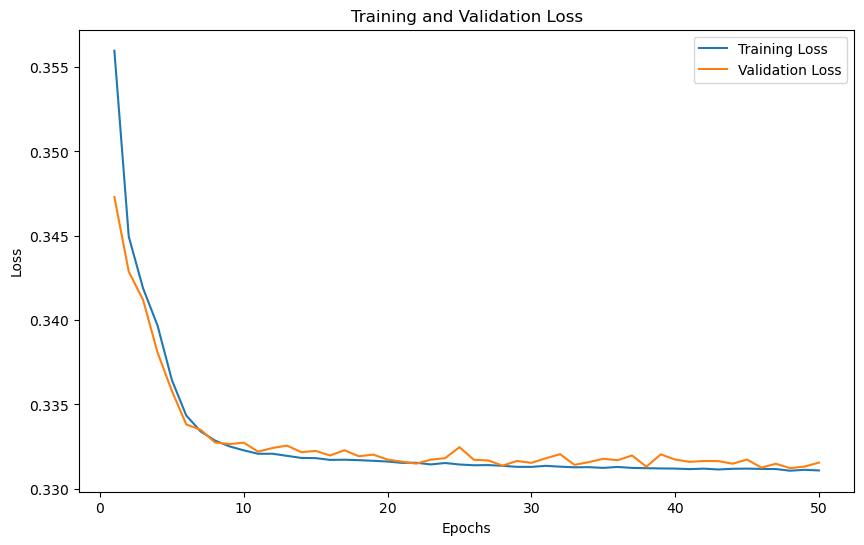

In [43]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.4 Test the baseline MLP model

In [44]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
baseline_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = baseline_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.28
Test Time: 0.2870650291442871 seconds


In [45]:
# Calculate True Positive (TP), True Nagative (TN), False Positive (FP), and False Nagative (FN) of one batch
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)
#if precision + recall > 0:
#    f1 = 2 * (precision * recall) / (precision + recall)
#else:
#    f1 = 0

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

Test Precision: 81.82
Test Recall: 64.29
Test F1 score: 72.00


In [46]:
# Import the library to see classification metrics
from sklearn.metrics import classification_report

In [47]:
# Check the classification report of one batch
print(classification_report(batch_y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        33
         1.0       0.82      0.64      0.72        14

    accuracy                           0.85        47
   macro avg       0.84      0.79      0.81        47
weighted avg       0.85      0.85      0.85        47



In [48]:
# Import the library to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

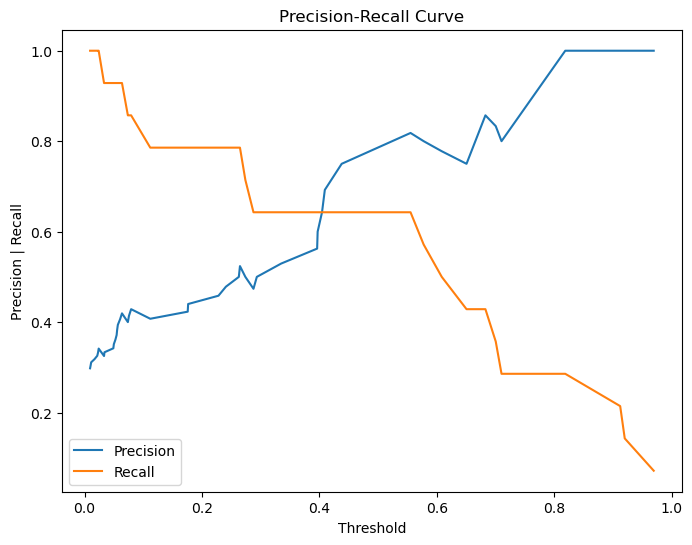

In [49]:
# Assign precisions, recalls, and the thresholds between two indicators from one batch
precisions, recalls, thresholds = precision_recall_curve(batch_y_test, outputs_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [50]:
# Calculate F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the index of the threshold with the maximum F1 score
best_threshold_index = np.argmax(f1_scores)

# Get the threshold from the index of the threshold
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold:.4f}')

Best Threshold: 0.5552


### 3.5 Find the optimal parameters of the baseline MLP model (a single hidden layer)

### 3.5.1. Find hidden units and learning rate

**Using nested for loops**

In [51]:
# Import itertools to show each combination to print out
import itertools

In [52]:
# Set the start timer
start_time = time.time()

# Define variables to store the best hyperparameters and accuracy
best_accuracy = 0.0
best_hyperparameters = {}

# Set the list of hyperparameters for grid search
learning_rates = [0.0001, 0.001, 0.01]
hidden_units = [4, 5, 6, 7, 8]

# Set the start timer
start_time = time.time()

# Nested loop for grid search
for lr, hu in itertools.product(learning_rates, hidden_units):
    print(f"Training model with learning rate: {lr}, hidden units: {hu}")
    
    # Initialize baseline MLP model with current hyperparameters
    baseline_mlp_model = hidden_1_MLP_model(input_size, hu, output_size)
    
    # Define optimizer and loss
    optimizer = torch.optim.Adam(baseline_mlp_model.parameters(), lr=lr)
    criterion = nn.BCELoss()
    
    # List to store accuracies for each fold
    accuracies = []
    
    # Apply repeated stratified K-Fold cross-validator
    for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
        print(f'>>>Fold {fold+1}>>>')
        # Get the data for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]
    
        # Normalise the features in the training set
        # Define the scaler
        scaler = MinMaxScaler()
        # Fit on the X training   
        scaler.fit(X_train_fold)
        # Scale the X training
        X_train_fold_norm = scaler.transform(X_train_fold)
        # Scale the X validation
        X_val_fold_norm = scaler.transform(X_val_fold)
        # Change the data type back to torch with float32
        X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
        X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
        # Convert the train and valitdation sets into TensorDatasets
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
        # Apply DataLoader to training and validation sets
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Train for each fold
        for epoch in range(number_of_epochs):
            baseline_mlp_model.train()
            
            for batch_X_train, batch_y_train in train_loader_fold:
                optimizer.zero_grad()
                outputs = baseline_mlp_model(batch_X_train)
                loss = criterion(outputs, batch_y_train)
                loss.backward()
                optimizer.step()
        
        # Validation
        baseline_mlp_model.eval()
            
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = baseline_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                predicted = (outputs_val > 0.5).float()
            
            # Calculate accuracy for this fold
            accuracy = (predicted == batch_y_val).sum().item() / len(batch_y_val)
            accuracies.append(accuracy)
            
    # Calculate average accuracy across folds for the current set of hyperparameters
    average_accuracy = sum(accuracies) / len(accuracies)
    
    # Check if this set of hyperparameters is the best so far
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_hyperparameters = {'learning_rate': lr, 'hidden_units': hu}

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

print("Grid search completed.")
print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy:", best_accuracy)

# Print the elapsed time
print("Grid Search with nested for loops:", grid_time, "seconds")

Training model with learning rate: 0.0001, hidden units: 4
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.0001, hidden units: 5
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.0001, hidden units: 6
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.0001, hidden units: 7
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.0001, hidden units: 8
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001, hidden units: 4
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001, hidden units: 5
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001, h

**Using Scikit-learn**

In [53]:
# Import the relevant library
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
# Set the start timer
start_time = time.time()

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(4,), (5,), (6,), (7,), (8,)]
}

# Create a MLPClassifier
mlp_classifier = MLPClassifier(batch_size=64, solver='adam', random_state=42)

# Perform grid search
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Print the elapsed time
print("Grid Search with Scikit-learn:", grid_time, "seconds")

Best Parameters: {'hidden_layer_sizes': (5,)}
Best Score: 0.7883273875798132
Grid Search with Scikit-learn: 492.87326312065125 seconds


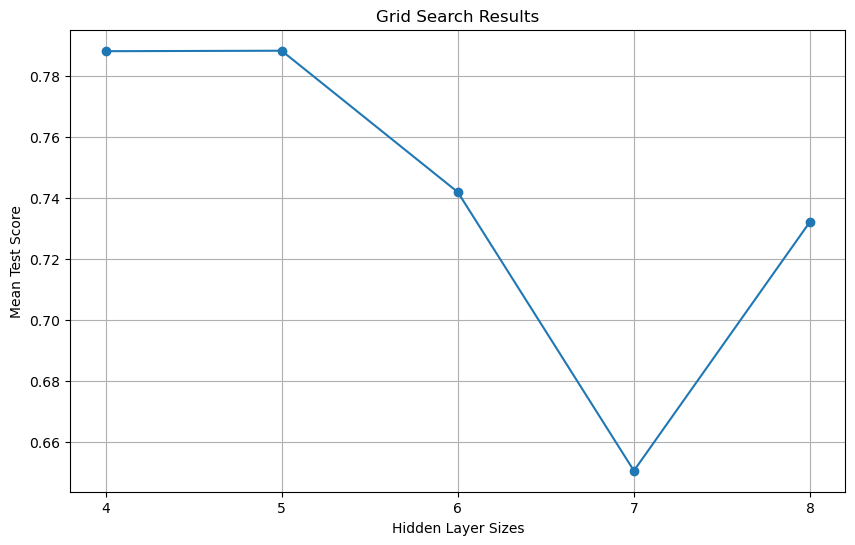

In [55]:
# Plot the hidden units and accuracy

# Extract the hyperparameters and scores
params = grid_search.cv_results_['params']
scores = grid_search.cv_results_['mean_test_score']

# Extract the hidden layer sizes from the params
hidden_layer_sizes = [param['hidden_layer_sizes'][0] for param in params]

# Plot the hyperparameter values vs. scores
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes, scores, marker='o', linestyle='-')
plt.title('Grid Search Results')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score')
plt.xticks(np.arange(min(hidden_layer_sizes), max(hidden_layer_sizes)+1, 1))
plt.grid(True)
plt.show()

In [56]:
# Set the start timer
start_time = time.time()

# Define the parameter grid for hidden units and learning rates
param_grid = {
    'hidden_layer_sizes': [(4,), (5,), (6,), (7,), (8,)],
    'learning_rate_init': [0.0001, 0.001, 0.01],
}

# Create a MLPClassifier
mlp_classifier = MLPClassifier(batch_size=64, solver='adam', random_state=42)

# Perform grid search
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Print the elapsed time
print("Grid Search with Scikit-learn:", grid_time, "seconds")

Best Parameters: {'hidden_layer_sizes': (4,), 'learning_rate_init': 0.0001}
Best Score: 0.7929552288547038
Grid Search with Scikit-learn: 1096.6491904258728 seconds


**Manual Search**

- 4 hidden units

In [57]:
# Define the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_unit = 4

In [58]:
# Set the number of epochs
number_of_epochs = 10 # The number has changed, as the validation loss started to increase after passing below 10th epoch

In [59]:
# Set the MLP model, loss function and optimizer
baseline_mlp_model = hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.Adam(baseline_mlp_model.parameters(), lr=0.001) 

In [60]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        baseline_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = baseline_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        baseline_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = baseline_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/10], Train Loss: 0.4809
Epoch [1/10], Validation Loss: 0.4248
Epoch [2/10], Train Loss: 0.4085
Epoch [2/10], Validation Loss: 0.3919
Epoch [3/10], Train Loss: 0.3887
Epoch [3/10], Validation Loss: 0.3796
Epoch [4/10], Train Loss: 0.3791
Epoch [4/10], Validation Loss: 0.3716
Epoch [5/10], Train Loss: 0.3722
Epoch [5/10], Validation Loss: 0.3655
Epoch [6/10], Train Loss: 0.3667
Epoch [6/10], Validation Loss: 0.3612
Epoch [7/10], Train Loss: 0.3619
Epoch [7/10], Validation Loss: 0.3565
Epoch [8/10], Train Loss: 0.3584
Epoch [8/10], Validation Loss: 0.3531
Epoch [9/10], Train Loss: 0.3559
Epoch [9/10], Validation Loss: 0.3510
Epoch [10/10], Train Loss: 0.3538
Epoch [10/10], Validation Loss: 0.3488
Fold 2:
Epoch [1/10], Train Loss: 0.3492
Epoch [1/10], Validation Loss: 0.3525
Epoch [2/10], Train Loss: 0.3476
Epoch [2/10], Validation Loss: 0.3519
Epoch [3/10], Train Loss: 0.3462
Epoch [3/10], Validation Loss: 0.3499
Epoch [4/10], Train Loss: 0.3449
Epoch [4/10], Validation L

In [61]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [62]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

In [63]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

10


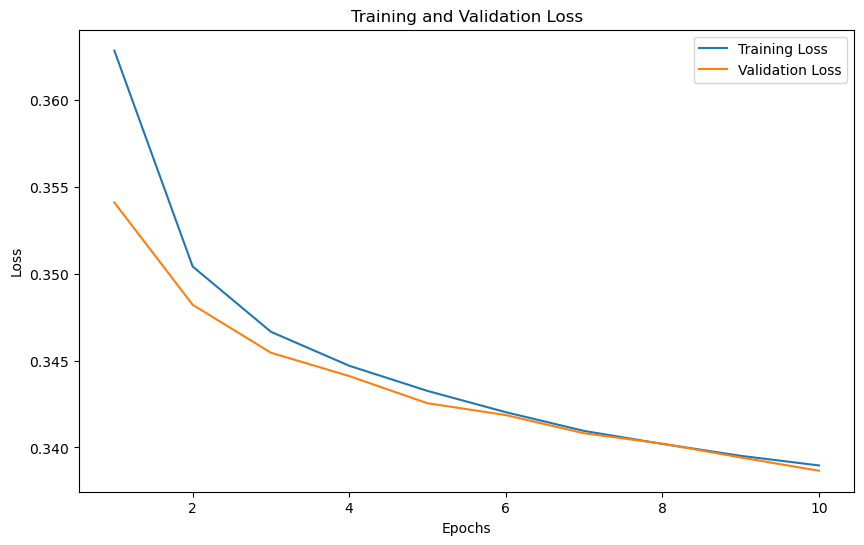

In [64]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
baseline_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = baseline_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.19
Test Time: 0.2890651226043701 seconds


- 5 hidden units

In [66]:
# Define the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_unit = 5

In [67]:
# Set the number of epochs
number_of_epochs = 10

In [68]:
# Set the MLP model, loss function and optimizer
baseline_mlp_model = hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.Adam(baseline_mlp_model.parameters(), lr=0.001)

In [69]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        baseline_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = baseline_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        baseline_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = baseline_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/10], Train Loss: 0.5238
Epoch [1/10], Validation Loss: 0.4291
Epoch [2/10], Train Loss: 0.4145
Epoch [2/10], Validation Loss: 0.3968
Epoch [3/10], Train Loss: 0.3892
Epoch [3/10], Validation Loss: 0.3756
Epoch [4/10], Train Loss: 0.3709
Epoch [4/10], Validation Loss: 0.3613
Epoch [5/10], Train Loss: 0.3604
Epoch [5/10], Validation Loss: 0.3543
Epoch [6/10], Train Loss: 0.3550
Epoch [6/10], Validation Loss: 0.3507
Epoch [7/10], Train Loss: 0.3516
Epoch [7/10], Validation Loss: 0.3476
Epoch [8/10], Train Loss: 0.3492
Epoch [8/10], Validation Loss: 0.3455
Epoch [9/10], Train Loss: 0.3473
Epoch [9/10], Validation Loss: 0.3434
Epoch [10/10], Train Loss: 0.3453
Epoch [10/10], Validation Loss: 0.3413
Fold 2:
Epoch [1/10], Train Loss: 0.3412
Epoch [1/10], Validation Loss: 0.3447
Epoch [2/10], Train Loss: 0.3404
Epoch [2/10], Validation Loss: 0.3445
Epoch [3/10], Train Loss: 0.3398
Epoch [3/10], Validation Loss: 0.3433
Epoch [4/10], Train Loss: 0.3393
Epoch [4/10], Validation L

In [70]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [71]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

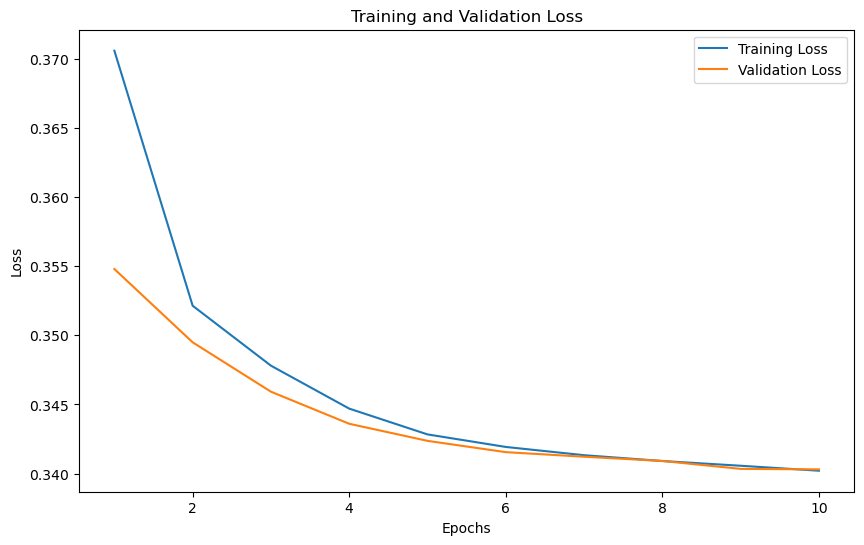

In [72]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
baseline_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = baseline_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 85.74
Test Time: 0.2870643138885498 seconds


- 2 hidden units

In [74]:
# Define the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_unit = 2

In [75]:
# Set the MLP model, loss function and optimizer
baseline_mlp_model = hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.Adam(baseline_mlp_model.parameters(), lr=0.001)

In [76]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        baseline_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = baseline_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        baseline_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = baseline_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/10], Train Loss: 0.6843
Epoch [1/10], Validation Loss: 0.5681
Epoch [2/10], Train Loss: 0.5181
Epoch [2/10], Validation Loss: 0.4610
Epoch [3/10], Train Loss: 0.4238
Epoch [3/10], Validation Loss: 0.3913
Epoch [4/10], Train Loss: 0.3775
Epoch [4/10], Validation Loss: 0.3629
Epoch [5/10], Train Loss: 0.3588
Epoch [5/10], Validation Loss: 0.3514
Epoch [6/10], Train Loss: 0.3514
Epoch [6/10], Validation Loss: 0.3470
Epoch [7/10], Train Loss: 0.3484
Epoch [7/10], Validation Loss: 0.3449
Epoch [8/10], Train Loss: 0.3469
Epoch [8/10], Validation Loss: 0.3438
Epoch [9/10], Train Loss: 0.3461
Epoch [9/10], Validation Loss: 0.3439
Epoch [10/10], Train Loss: 0.3457
Epoch [10/10], Validation Loss: 0.3428
Fold 2:
Epoch [1/10], Train Loss: 0.3435
Epoch [1/10], Validation Loss: 0.3466
Epoch [2/10], Train Loss: 0.3433
Epoch [2/10], Validation Loss: 0.3464
Epoch [3/10], Train Loss: 0.3430
Epoch [3/10], Validation Loss: 0.3460
Epoch [4/10], Train Loss: 0.3429
Epoch [4/10], Validation L

In [77]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
baseline_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = baseline_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 85.60
Test Time: 0.2893669605255127 seconds


### 3.5.2. Apply each hidden units and learning rate from search

In [78]:
# Revised the structure of 1 hidden layer MLP model
class revised_hidden_1_MLP_model(nn.Module):
    def __init__(self, input_size, hidden_unit, output_size):
        super(revised_hidden_1_MLP_model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_unit)
        self.fc2 = nn.Linear(hidden_unit, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        output_layer1 = self.fc1(x)
        layer1_activated = self.relu(output_layer1)
        output_layer2 = self.fc2(layer1_activated)
        output_activated = self.sigmoid(output_layer2)
        return output_activated

Nested for loop: Best hyperparameters: {'learning_rate': 0.001, 'hidden_units': 6}

In [287]:
# Define the structure of the revised MLP model
input_size = 10
output_size = 1
hidden_unit = 6
lr = 0.001

In [288]:
# Set the MLP model, loss function and optimizer
revised_mlp_model = revised_hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr)

In [289]:
# Set the number of epochs
number_of_epochs = 10

In [290]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/10], Train Loss: 0.4474
Epoch [1/10], Validation Loss: 0.4037
Epoch [2/10], Train Loss: 0.3947
Epoch [2/10], Validation Loss: 0.3837
Epoch [3/10], Train Loss: 0.3825
Epoch [3/10], Validation Loss: 0.3756
Epoch [4/10], Train Loss: 0.3756
Epoch [4/10], Validation Loss: 0.3699
Epoch [5/10], Train Loss: 0.3701
Epoch [5/10], Validation Loss: 0.3638
Epoch [6/10], Train Loss: 0.3647
Epoch [6/10], Validation Loss: 0.3590
Epoch [7/10], Train Loss: 0.3604
Epoch [7/10], Validation Loss: 0.3552
Epoch [8/10], Train Loss: 0.3570
Epoch [8/10], Validation Loss: 0.3531
Epoch [9/10], Train Loss: 0.3543
Epoch [9/10], Validation Loss: 0.3500
Epoch [10/10], Train Loss: 0.3519
Epoch [10/10], Validation Loss: 0.3484
Fold 2:
Epoch [1/10], Train Loss: 0.3475
Epoch [1/10], Validation Loss: 0.3506
Epoch [2/10], Train Loss: 0.3459
Epoch [2/10], Validation Loss: 0.3492
Epoch [3/10], Train Loss: 0.3447
Epoch [3/10], Validation Loss: 0.3501
Epoch [4/10], Train Loss: 0.3439
Epoch [4/10], Validation L

In [298]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [299]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

In [300]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

10


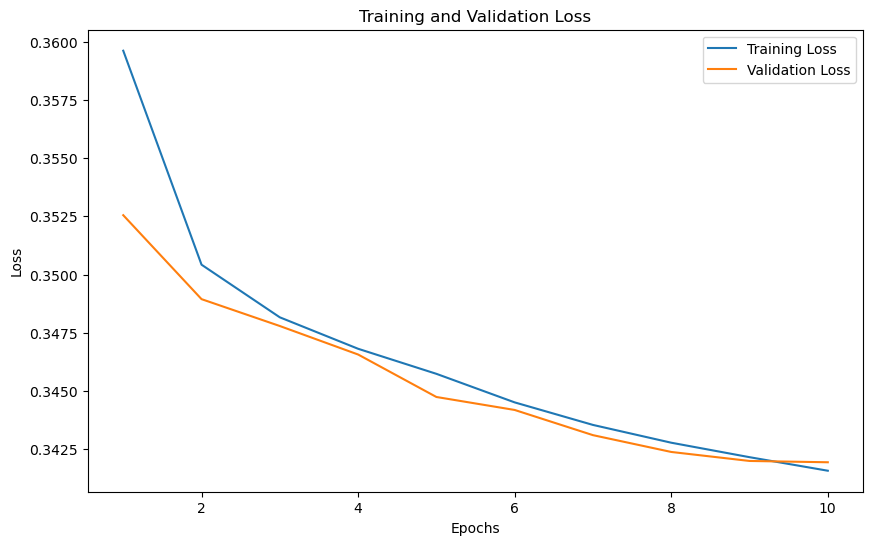

In [301]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [302]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 85.86
Test Time: 0.29706740379333496 seconds


Scikit-learn: Best Parameters: {'hidden_layer_sizes': (4,), 'learning_rate_init': 0.0001}

In [87]:
# Define the structure of the revised MLP model
input_size = 10
output_size = 1
hidden_unit = 4
lr = 0.0001

In [88]:
# Set the MLP model, loss function and optimizer
revised_mlp_model = revised_hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr)

In [89]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/10], Train Loss: 0.7188
Epoch [1/10], Validation Loss: 0.6345
Epoch [2/10], Train Loss: 0.5778
Epoch [2/10], Validation Loss: 0.5355
Epoch [3/10], Train Loss: 0.5157
Epoch [3/10], Validation Loss: 0.4996
Epoch [4/10], Train Loss: 0.4907
Epoch [4/10], Validation Loss: 0.4806
Epoch [5/10], Train Loss: 0.4745
Epoch [5/10], Validation Loss: 0.4661
Epoch [6/10], Train Loss: 0.4617
Epoch [6/10], Validation Loss: 0.4541
Epoch [7/10], Train Loss: 0.4516
Epoch [7/10], Validation Loss: 0.4453
Epoch [8/10], Train Loss: 0.4442
Epoch [8/10], Validation Loss: 0.4387
Epoch [9/10], Train Loss: 0.4384
Epoch [9/10], Validation Loss: 0.4332
Epoch [10/10], Train Loss: 0.4334
Epoch [10/10], Validation Loss: 0.4285
Fold 2:
Epoch [1/10], Train Loss: 0.4269
Epoch [1/10], Validation Loss: 0.4284
Epoch [2/10], Train Loss: 0.4227
Epoch [2/10], Validation Loss: 0.4247
Epoch [3/10], Train Loss: 0.4189
Epoch [3/10], Validation Loss: 0.4214
Epoch [4/10], Train Loss: 0.4156
Epoch [4/10], Validation L

In [90]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [91]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

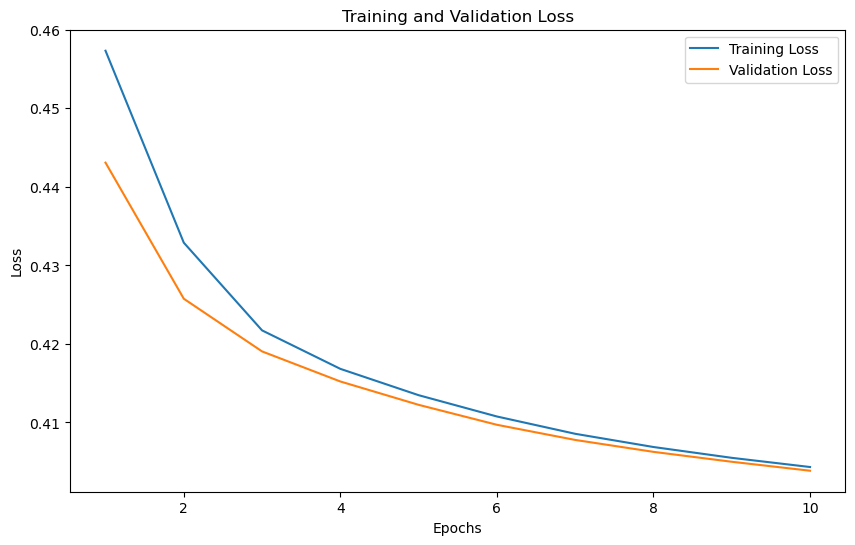

In [92]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 83.55
Test Time: 0.2910654544830322 seconds


### 3.5.3. Find weight decay

**Select 6 hidden units and 0.001 learning rate**

**Keep epochs as 10**

**Using nested for loops**

In [303]:
# Set the start timer
start_time = time.time()

# Define variables to store the best hyperparameters and accuracy
best_accuracy = 0.0
best_hyperparameters = {}

# Set the list of hyperparameters for grid search
learning_rates = [0.001]
hidden_units = [6]
weight_decays = [0.001, 0.01, 0.1, 0]

# Nested loop for gid search
for lr, hu, wd in itertools.product(learning_rates, hidden_units, weight_decays):
    print(f"Training model with learning rate: {lr}, hidden units: {hu}, weight decay: {wd}")
    
    # Initialize baseline MLP model with current hyperparameters
    revised_mlp_model = revised_hidden_1_MLP_model(input_size, hu, output_size)
    
    # Define optimizer and criterion
    optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr, weight_decay=wd)
    criterion = nn.BCELoss()
    
    # List to store accuracies for each fold
    accuracies = []
    
    # Apply repeated stratified K-Fold cross-validator
    for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
        print(f'>>>Fold {fold+1}>>>')
        # Get the data for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]
    
        # Normalise the features in the training set
        # Define the scaler
        scaler = MinMaxScaler()
        # Fit on the X training   
        scaler.fit(X_train_fold)
        # Scale the X training
        X_train_fold_norm = scaler.transform(X_train_fold)
        # Scale the X validation
        X_val_fold_norm = scaler.transform(X_val_fold)
        # Change the data type back to torch with float32
        X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
        X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
        # Convert the train and validation sets into TensorDatasets
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
        # Apply DataLoader to training and validation sets
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Train for each fold
        for epoch in range(number_of_epochs):
            revised_mlp_model.train()
            
            for batch_X_train, batch_y_train in train_loader_fold:
                optimizer.zero_grad()
                outputs = revised_mlp_model(batch_X_train)
                loss = criterion(outputs, batch_y_train)
                loss.backward()
                optimizer.step()
        
        # Validation
        revised_mlp_model.eval()
            
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                predicted = (outputs_val > 0.5).float()
            
            # Calculate accuracy for this fold
            accuracy = (predicted == batch_y_val).sum().item() / len(batch_y_val)
            accuracies.append(accuracy)
            
    # Calculate average accuracy across folds for the current set of hyperparameters
    average_accuracy = sum(accuracies) / len(accuracies)
    
    # Check if this set of hyperparameters is the best so far
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_hyperparameters = {'learning_rate': lr, 'hidden_units': hu, 'weight_decay': wd}

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time 
        
print("Grid search completed.")
print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy:", best_accuracy)

# Print the elapsed time
print("Grid Search with nested for loops:", grid_time, "seconds")

Training model with learning rate: 0.001, hidden units: 6, weight decay: 0.001
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001, hidden units: 6, weight decay: 0.01
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001, hidden units: 6, weight decay: 0.1
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001, hidden units: 6, weight decay: 0
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Grid search completed.
Best hyperparameters: {'learning_rate': 0.001, 'hidden_units': 6, 'weight_decay': 0}
Best accuracy: 0.8292682926829268
Grid Search with nested for loops: 289.3200967311859 seconds


**Using Scikit-learn**

In [304]:
# Set the start timer
start_time = time.time()

# Define a parameter grid
param_grid = {
    'hidden_layer_sizes': [6],
    'learning_rate_init': [0.001],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Create a MLPClassifier
resived_mlp = MLPClassifier(batch_size=64, solver='adam', random_state=42)

# Perform grid search
grid_search = GridSearchCV(resived_mlp, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Print the elapsed time
print("Grid Search with Scikit-learn:", grid_time, "seconds")

Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': 6, 'learning_rate_init': 0.001}
Best Score: 0.7419997424769176
Grid Search with Scikit-learn: 332.748015165329 seconds


### 3.5.4. Apply weight decay from search

Nested for loop: Best hyperparameters: {'learning_rate': 0.001, 'hidden_units': 6, 'weight_decay': 0}

In [324]:
# Define the size and unit of the revised MLP model
input_size = 10
output_size = 1
hidden_unit = 6
lr = 0.001
wd = 0.0

In [325]:
# Set the MLP model, loss function and optimizer
revised_mlp_model = revised_hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr, weight_decay=wd)

In [348]:
# Set the number of epochs
number_of_epochs = 10

In [327]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/10], Train Loss: 0.4873
Epoch [1/10], Validation Loss: 0.4227
Epoch [2/10], Train Loss: 0.4065
Epoch [2/10], Validation Loss: 0.3917
Epoch [3/10], Train Loss: 0.3888
Epoch [3/10], Validation Loss: 0.3806
Epoch [4/10], Train Loss: 0.3803
Epoch [4/10], Validation Loss: 0.3737
Epoch [5/10], Train Loss: 0.3743
Epoch [5/10], Validation Loss: 0.3684
Epoch [6/10], Train Loss: 0.3700
Epoch [6/10], Validation Loss: 0.3645
Epoch [7/10], Train Loss: 0.3665
Epoch [7/10], Validation Loss: 0.3617
Epoch [8/10], Train Loss: 0.3638
Epoch [8/10], Validation Loss: 0.3596
Epoch [9/10], Train Loss: 0.3614
Epoch [9/10], Validation Loss: 0.3572
Epoch [10/10], Train Loss: 0.3595
Epoch [10/10], Validation Loss: 0.3548
Fold 2:
Epoch [1/10], Train Loss: 0.3550
Epoch [1/10], Validation Loss: 0.3587
Epoch [2/10], Train Loss: 0.3533
Epoch [2/10], Validation Loss: 0.3580
Epoch [3/10], Train Loss: 0.3522
Epoch [3/10], Validation Loss: 0.3563
Epoch [4/10], Train Loss: 0.3509
Epoch [4/10], Validation L

In [328]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [329]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

In [355]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

10


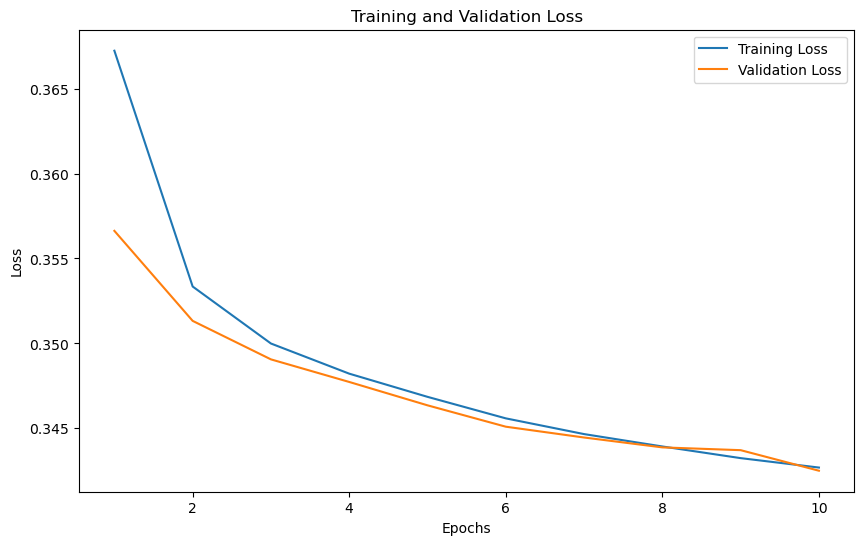

In [331]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [332]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 85.87
Test Time: 0.2920653820037842 seconds


Scikit-learn: Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': 6, 'learning_rate_init': 0.001}

In [333]:
# Define the size and unit of the revised MLP model
input_size = 10
output_size = 1
hidden_unit = 6
lr = 0.001
wd = 0.0001

In [334]:
# Set the MLP model, loss function and optimizer
revised_mlp_model = revised_hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr, weight_decay=wd)

In [335]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/10], Train Loss: 0.4699
Epoch [1/10], Validation Loss: 0.4105
Epoch [2/10], Train Loss: 0.4027
Epoch [2/10], Validation Loss: 0.3913
Epoch [3/10], Train Loss: 0.3901
Epoch [3/10], Validation Loss: 0.3816
Epoch [4/10], Train Loss: 0.3806
Epoch [4/10], Validation Loss: 0.3723
Epoch [5/10], Train Loss: 0.3708
Epoch [5/10], Validation Loss: 0.3630
Epoch [6/10], Train Loss: 0.3625
Epoch [6/10], Validation Loss: 0.3555
Epoch [7/10], Train Loss: 0.3561
Epoch [7/10], Validation Loss: 0.3510
Epoch [8/10], Train Loss: 0.3521
Epoch [8/10], Validation Loss: 0.3517
Epoch [9/10], Train Loss: 0.3494
Epoch [9/10], Validation Loss: 0.3448
Epoch [10/10], Train Loss: 0.3474
Epoch [10/10], Validation Loss: 0.3435
Fold 2:
Epoch [1/10], Train Loss: 0.3437
Epoch [1/10], Validation Loss: 0.3468
Epoch [2/10], Train Loss: 0.3421
Epoch [2/10], Validation Loss: 0.3459
Epoch [3/10], Train Loss: 0.3407
Epoch [3/10], Validation Loss: 0.3442
Epoch [4/10], Train Loss: 0.3396
Epoch [4/10], Validation L

In [336]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [337]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

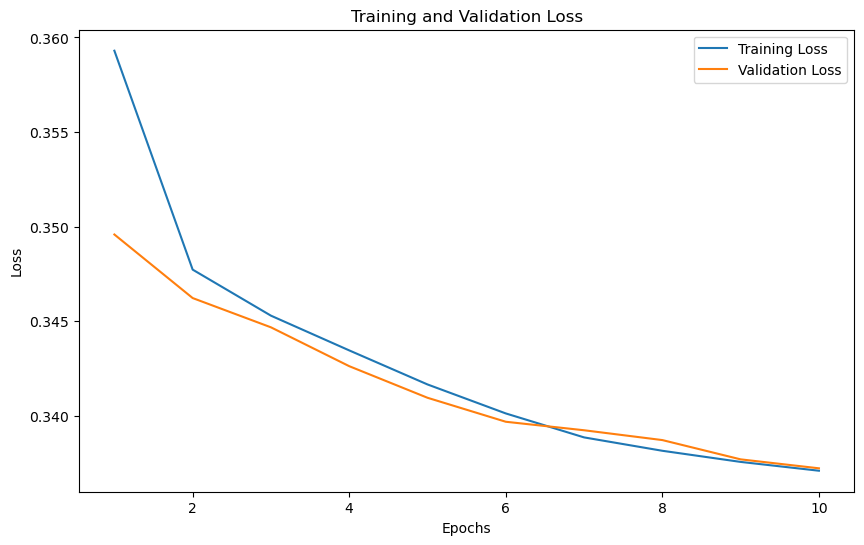

In [338]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [339]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 85.88
Test Time: 0.29706692695617676 seconds


After applying weight decay, the test accuracy has slightly increased. Therefore, 0.0001 is applied for weight decay.

### 3.5.5. Apply learning rate scheduler

Three learning rate schedulers are tested.

- STEP LR

In [349]:
# Define the structure of the revised MLP model
input_size = 10
output_size = 1
hidden_unit = 6
lr = 0.001
wd = 0.0001

In [350]:
# Set the MLP model, loss function and optimizer
revised_mlp_model = revised_hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr, weight_decay=wd)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [351]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Apply the learning rate scheduler
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print(f"Epoch {epoch + 1}: Adam lr {before_lr:.4f} -> {after_lr:.4f}")
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch 1: Adam lr 0.0010 -> 0.0010
Epoch [1/10], Train Loss: 0.4970
Epoch [1/10], Validation Loss: 0.4218
Epoch 2: Adam lr 0.0010 -> 0.0010
Epoch [2/10], Train Loss: 0.3977
Epoch [2/10], Validation Loss: 0.3757
Epoch 3: Adam lr 0.0010 -> 0.0010
Epoch [3/10], Train Loss: 0.3688
Epoch [3/10], Validation Loss: 0.3585
Epoch 4: Adam lr 0.0010 -> 0.0010
Epoch [4/10], Train Loss: 0.3560
Epoch [4/10], Validation Loss: 0.3495
Epoch 5: Adam lr 0.0010 -> 0.0001
Epoch [5/10], Train Loss: 0.3494
Epoch [5/10], Validation Loss: 0.3446
Epoch 6: Adam lr 0.0001 -> 0.0001
Epoch [6/10], Train Loss: 0.3466
Epoch [6/10], Validation Loss: 0.3436
Epoch 7: Adam lr 0.0001 -> 0.0001
Epoch [7/10], Train Loss: 0.3462
Epoch [7/10], Validation Loss: 0.3433
Epoch 8: Adam lr 0.0001 -> 0.0001
Epoch [8/10], Train Loss: 0.3458
Epoch [8/10], Validation Loss: 0.3430
Epoch 9: Adam lr 0.0001 -> 0.0001
Epoch [9/10], Train Loss: 0.3455
Epoch [9/10], Validation Loss: 0.3428
Epoch 10: Adam lr 0.0001 -> 0.0000
Epoch [10/10

In [356]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [357]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

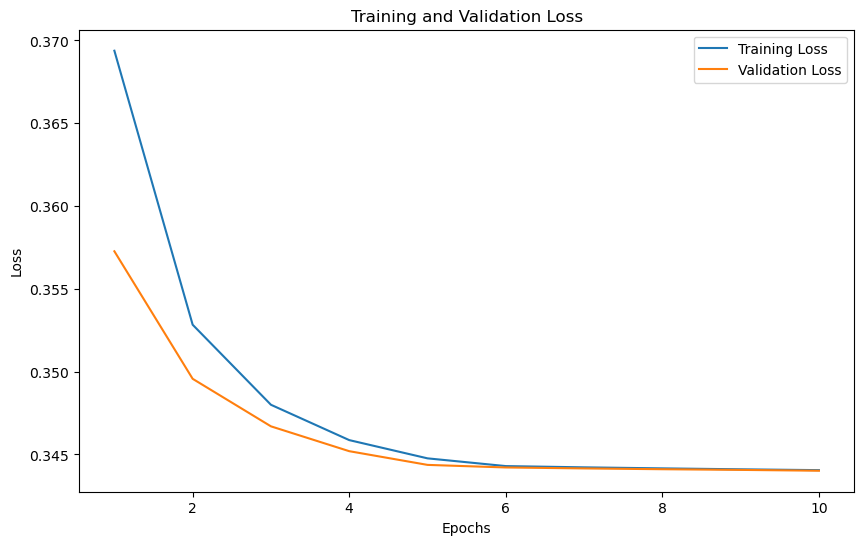

In [358]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [359]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 85.44
Test Time: 0.6641910076141357 seconds


- EXPONENTIAL LR

In [367]:
# Set the MLP model, loss function and optimizer
revised_mlp_model = revised_hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr, weight_decay=wd)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

In [368]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Apply the learning rate scheduler
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print(f"Epoch {epoch + 1}: Adam lr {before_lr:.4f} -> {after_lr:.4f}")
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch 1: Adam lr 0.0010 -> 0.0010
Epoch [1/10], Train Loss: 0.4561
Epoch [1/10], Validation Loss: 0.4002
Epoch 2: Adam lr 0.0010 -> 0.0010
Epoch [2/10], Train Loss: 0.3921
Epoch [2/10], Validation Loss: 0.3816
Epoch 3: Adam lr 0.0010 -> 0.0010
Epoch [3/10], Train Loss: 0.3800
Epoch [3/10], Validation Loss: 0.3722
Epoch 4: Adam lr 0.0010 -> 0.0010
Epoch [4/10], Train Loss: 0.3721
Epoch [4/10], Validation Loss: 0.3651
Epoch 5: Adam lr 0.0010 -> 0.0010
Epoch [5/10], Train Loss: 0.3654
Epoch [5/10], Validation Loss: 0.3586
Epoch 6: Adam lr 0.0010 -> 0.0009
Epoch [6/10], Train Loss: 0.3588
Epoch [6/10], Validation Loss: 0.3537
Epoch 7: Adam lr 0.0009 -> 0.0009
Epoch [7/10], Train Loss: 0.3540
Epoch [7/10], Validation Loss: 0.3484
Epoch 8: Adam lr 0.0009 -> 0.0009
Epoch [8/10], Train Loss: 0.3503
Epoch [8/10], Validation Loss: 0.3454
Epoch 9: Adam lr 0.0009 -> 0.0009
Epoch [9/10], Train Loss: 0.3479
Epoch [9/10], Validation Loss: 0.3433
Epoch 10: Adam lr 0.0009 -> 0.0009
Epoch [10/10

In [369]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [370]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

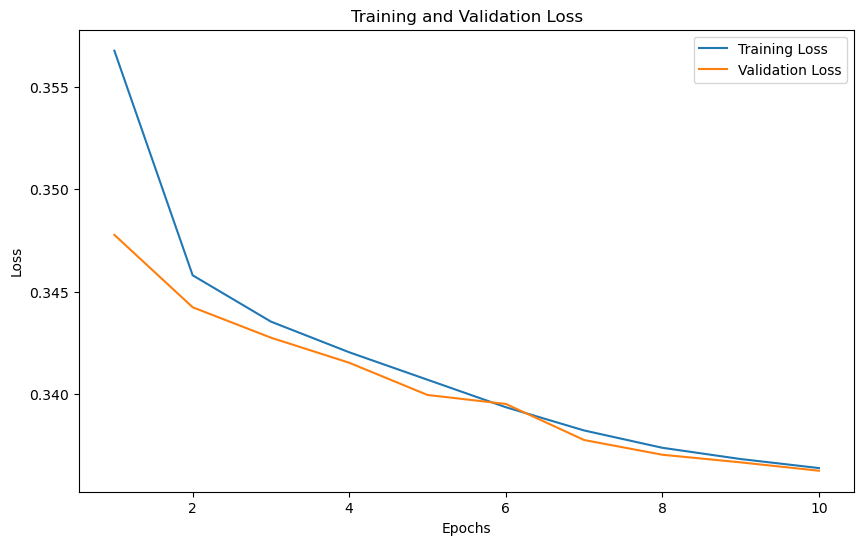

In [371]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [372]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.28
Test Time: 0.6391434669494629 seconds


- LINEAR LR

In [373]:
# Set the MLP model, loss function and optimizer
revised_mlp_model = revised_hidden_1_MLP_model(input_size, hidden_unit, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr, weight_decay=wd)
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.1, total_iters=60)

In [374]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Apply the learning rate scheduler
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print(f"Epoch {epoch + 1}: Adam lr {before_lr:.4f} -> {after_lr:.4f}")
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch 1: Adam lr 0.0001 -> 0.0001
Epoch [1/10], Train Loss: 0.5582
Epoch [1/10], Validation Loss: 0.5033
Epoch 2: Adam lr 0.0001 -> 0.0001
Epoch [2/10], Train Loss: 0.4862
Epoch [2/10], Validation Loss: 0.4704
Epoch 3: Adam lr 0.0001 -> 0.0001
Epoch [3/10], Train Loss: 0.4603
Epoch [3/10], Validation Loss: 0.4493
Epoch 4: Adam lr 0.0001 -> 0.0002
Epoch [4/10], Train Loss: 0.4444
Epoch [4/10], Validation Loss: 0.4366
Epoch 5: Adam lr 0.0002 -> 0.0002
Epoch [5/10], Train Loss: 0.4342
Epoch [5/10], Validation Loss: 0.4272
Epoch 6: Adam lr 0.0002 -> 0.0002
Epoch [6/10], Train Loss: 0.4258
Epoch [6/10], Validation Loss: 0.4192
Epoch 7: Adam lr 0.0002 -> 0.0002
Epoch [7/10], Train Loss: 0.4185
Epoch [7/10], Validation Loss: 0.4122
Epoch 8: Adam lr 0.0002 -> 0.0002
Epoch [8/10], Train Loss: 0.4123
Epoch [8/10], Validation Loss: 0.4062
Epoch 9: Adam lr 0.0002 -> 0.0002
Epoch [9/10], Train Loss: 0.4069
Epoch [9/10], Validation Loss: 0.4011
Epoch 10: Adam lr 0.0002 -> 0.0002
Epoch [10/10

In [375]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [376]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

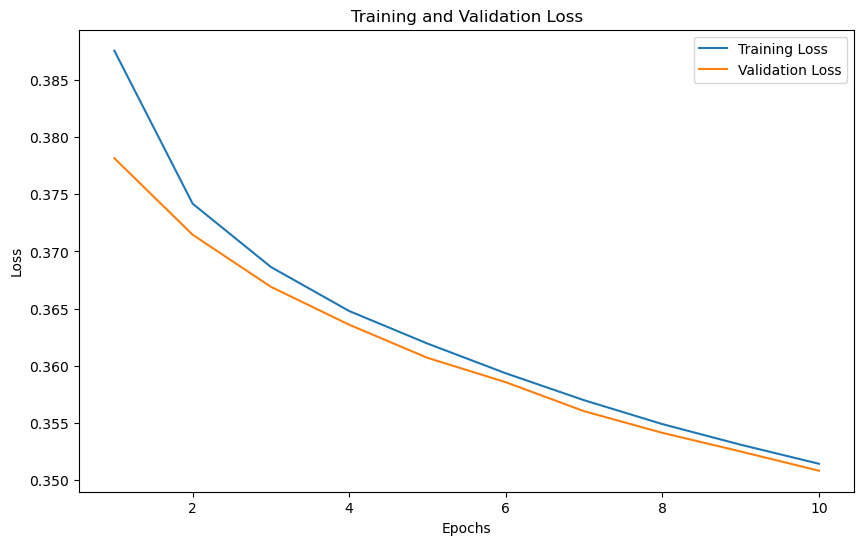

In [377]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [378]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.20
Test Time: 0.7483365535736084 seconds


---
The model which has the highest test accuracy is the MLP model with 6 hidden units, 10 epochs, 0.001 learning rate with 0.0001 weight decay applying exponential learning rate scheduler.

---

### 3.6 Define the MLP model with two hidden layers

In [305]:
# Define the MLP model class with 2 hidden layers
class MLP_model_hidden_2(nn.Module):
    def __init__(self, input_size, hidden_units1, hidden_units2, output_size):
        super(MLP_model_hidden_2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units1)
        self.fc2 = nn.Linear(hidden_units1, hidden_units2)
        self.fc3 = nn.Linear(hidden_units2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

In [306]:
# Define the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 4 #random number
hidden_units2 = 4 #random number

In [307]:
# Set the MLP model, loss function and optimizer
hidden_2_mlp_model = MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(hidden_2_mlp_model.parameters(), lr=0.001) # The learning rate is set to the default value

In [308]:
# Set the number of epochs
number_of_epochs = 50 # Random number

### 3.7 Train the MLP model with two hidden layers

In [309]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The average loss for the epoch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # Define the structure of the baseline of MLP model
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The average loss for the epoch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # Define the structure of the baseline of MLP model
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/50], Train Loss: 0.4922
Epoch [1/50], Validation Loss: 0.4383
Epoch [2/50], Train Loss: 0.4269
Epoch [2/50], Validation Loss: 0.4124
Epoch [3/50], Train Loss: 0.4094
Epoch [3/50], Validation Loss: 0.4017
Epoch [4/50], Train Loss: 0.3936
Epoch [4/50], Validation Loss: 0.3755
Epoch [5/50], Train Loss: 0.3670
Epoch [5/50], Validation Loss: 0.3537
Epoch [6/50], Train Loss: 0.3510
Epoch [6/50], Validation Loss: 0.3431
Epoch [7/50], Train Loss: 0.3444
Epoch [7/50], Validation Loss: 0.3405
Epoch [8/50], Train Loss: 0.3415
Epoch [8/50], Validation Loss: 0.3367
Epoch [9/50], Train Loss: 0.3399
Epoch [9/50], Validation Loss: 0.3355
Epoch [10/50], Train Loss: 0.3388
Epoch [10/50], Validation Loss: 0.3349
Epoch [11/50], Train Loss: 0.3377
Epoch [11/50], Validation Loss: 0.3366
Epoch [12/50], Train Loss: 0.3368
Epoch [12/50], Validation Loss: 0.3331
Epoch [13/50], Train Loss: 0.3359
Epoch [13/50], Validation Loss: 0.3326
Epoch [14/50], Train Loss: 0.3352
Epoch [14/50], Validation L

Epoch [14/50], Train Loss: 0.3290
Epoch [14/50], Validation Loss: 0.3285
Epoch [15/50], Train Loss: 0.3292
Epoch [15/50], Validation Loss: 0.3281
Epoch [16/50], Train Loss: 0.3290
Epoch [16/50], Validation Loss: 0.3291
Epoch [17/50], Train Loss: 0.3291
Epoch [17/50], Validation Loss: 0.3283
Epoch [18/50], Train Loss: 0.3292
Epoch [18/50], Validation Loss: 0.3284
Epoch [19/50], Train Loss: 0.3292
Epoch [19/50], Validation Loss: 0.3286
Epoch [20/50], Train Loss: 0.3289
Epoch [20/50], Validation Loss: 0.3281
Epoch [21/50], Train Loss: 0.3290
Epoch [21/50], Validation Loss: 0.3287
Epoch [22/50], Train Loss: 0.3290
Epoch [22/50], Validation Loss: 0.3283
Epoch [23/50], Train Loss: 0.3291
Epoch [23/50], Validation Loss: 0.3285
Epoch [24/50], Train Loss: 0.3290
Epoch [24/50], Validation Loss: 0.3283
Epoch [25/50], Train Loss: 0.3291
Epoch [25/50], Validation Loss: 0.3288
Epoch [26/50], Train Loss: 0.3292
Epoch [26/50], Validation Loss: 0.3284
Epoch [27/50], Train Loss: 0.3290
Epoch [27/50], Va

Epoch [27/50], Train Loss: 0.3293
Epoch [27/50], Validation Loss: 0.3274
Epoch [28/50], Train Loss: 0.3293
Epoch [28/50], Validation Loss: 0.3270
Epoch [29/50], Train Loss: 0.3294
Epoch [29/50], Validation Loss: 0.3284
Epoch [30/50], Train Loss: 0.3294
Epoch [30/50], Validation Loss: 0.3280
Epoch [31/50], Train Loss: 0.3294
Epoch [31/50], Validation Loss: 0.3273
Epoch [32/50], Train Loss: 0.3294
Epoch [32/50], Validation Loss: 0.3270
Epoch [33/50], Train Loss: 0.3293
Epoch [33/50], Validation Loss: 0.3276
Epoch [34/50], Train Loss: 0.3295
Epoch [34/50], Validation Loss: 0.3291
Epoch [35/50], Train Loss: 0.3294
Epoch [35/50], Validation Loss: 0.3280
Epoch [36/50], Train Loss: 0.3294
Epoch [36/50], Validation Loss: 0.3274
Epoch [37/50], Train Loss: 0.3293
Epoch [37/50], Validation Loss: 0.3318
Epoch [38/50], Train Loss: 0.3293
Epoch [38/50], Validation Loss: 0.3274
Epoch [39/50], Train Loss: 0.3292
Epoch [39/50], Validation Loss: 0.3270
Epoch [40/50], Train Loss: 0.3296
Epoch [40/50], Va

In [310]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [311]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

In [312]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

50


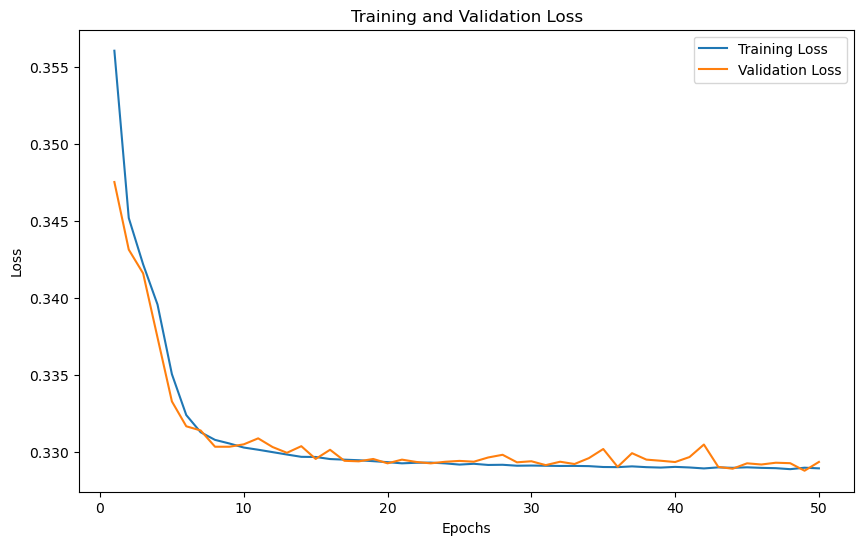

In [313]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.8 Test the MLP model with two hidden layers

In [314]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.47
Test Time: 0.3070693016052246 seconds


In [315]:
# Calculate True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN) of one batch
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)
#if precision + recall > 0:
#    f1 = 2 * (precision * recall) / (precision + recall)
#else:
#    f1 = 0

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

Test Precision: 81.82
Test Recall: 64.29
Test F1 score: 72.00


In [316]:
# Check the classification report of one batch
print(classification_report(batch_y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        33
         1.0       0.82      0.64      0.72        14

    accuracy                           0.85        47
   macro avg       0.84      0.79      0.81        47
weighted avg       0.85      0.85      0.85        47



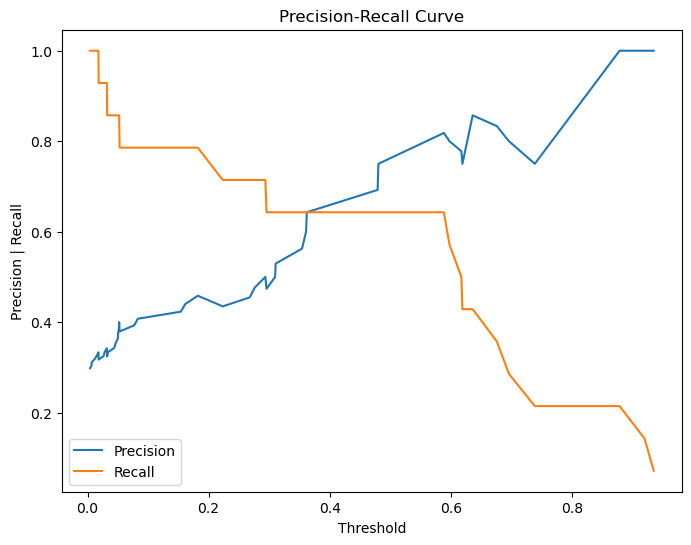

In [317]:
# Assign precisions, recalls, and the thresholds between two indicators from one batch
precisions, recalls, thresholds = precision_recall_curve(batch_y_test, outputs_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [318]:
# Calculate F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the index of the threshold with the maximum F1 score
best_threshold_index = np.argmax(f1_scores)

# Get the threshold from the index of the threshold
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold:.4f}')

Best Threshold: 0.5886


### 3.9. Find the optimal parameters of the MLP model (two hidden layers)¶

### 3.9.1. Find hidden units and learning rate

**Find hidden units for each hidden layer**

**Using nested for loop**

In [340]:
# Set the number of epochs
number_of_epochs = 12 # The number has changed, as the validation loss started to increase after passing below 12th epoch

In [341]:
# Set the start timer
start_time = time.time()

# Define variables to store the best hyperparameters and accuracy
best_accuracy = 0.0
best_hyperparameters = {}

# Set the list of hidden units for grid search
hidden_units1 = [4, 5, 6]
hidden_units2 = [4, 5, 6]

# Nested loop for grid search
for hu1 in hidden_units1:
    for hu2 in hidden_units2:
        print(f"Training model with hidden units: {hu1} & {hu2}")
    
        # Initialize baseline MLP model with current number of hidden units
        hidden_2_mlp_model = MLP_model_hidden_2(input_size, hu1, hu2, output_size)
    
        # Define optimizer and criterion
        optimizer = torch.optim.Adam(hidden_2_mlp_model.parameters())
        criterion = nn.BCELoss()
    
        # List to store accuracies for each fold
        accuracies = []
        
        # Apply repeated stratified K-Fold cross-validator
        for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
            print(f'>>>Fold {fold+1}>>>')
            # Get the data for this fold
            X_train_fold = X_train[train_indices]
            y_train_fold = y_train[train_indices]
            X_val_fold = X_train[val_indices]
            y_val_fold = y_train[val_indices]
    
            # Normalize the features in the training set
            scaler = MinMaxScaler()
            scaler.fit(X_train_fold)
            X_train_fold_norm = scaler.transform(X_train_fold)
            X_val_fold_norm = scaler.transform(X_val_fold)
            X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
            X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
            # Convert the train and validation sets into TensorDatasets
            train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
            val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
            # Apply DataLoader to training and validation sets
            train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
            val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

            # Train for each fold
            for epoch in range(number_of_epochs):
                hidden_2_mlp_model.train()
                for batch_X_train, batch_y_train in train_loader_fold:
                    optimizer.zero_grad()
                    outputs = hidden_2_mlp_model(batch_X_train)
                    loss = criterion(outputs, batch_y_train)
                    loss.backward()
                    optimizer.step()
        
            # Validation
            hidden_2_mlp_model.eval()
            with torch.no_grad():
                for batch_X_val, batch_y_val in val_loader_fold:
                    outputs_val = hidden_2_mlp_model(batch_X_val)
                    val_loss = criterion(outputs_val, batch_y_val)
                    predicted = (outputs_val > 0.5).float()
            
                # Calculate accuracy for this fold
                accuracy = (predicted == batch_y_val).sum().item() / len(batch_y_val)
                accuracies.append(accuracy)
            
        # Calculate average accuracy across folds for the current number of hidden units
        average_accuracy = sum(accuracies) / len(accuracies)
    
        # Check if this number of hidden units is the best so far
        if average_accuracy > best_accuracy:
            best_accuracy = average_accuracy
            best_hyperparameters = {'hidden_units': (hu1, hu2)}

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time 
        
print("Grid search completed.")
print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy:", best_accuracy)

# Print the elapsed time
print("Grid Search with nested for loops:", grid_time, "seconds")

Training model with hidden units: 4 & 4
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 4 & 5
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 4 & 6
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 5 & 4
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 5 & 5
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 5 & 6
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 6 & 4
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 6 & 5
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with hidden units: 6 & 6
>>>Fold 1>>>
>>>

**Using Scikit-learn**

In [342]:
# Set the start timer
start_time = time.time()

# Define the parameter grid
hidden_sizes = [4, 5, 6]
best_accuracy = 0
best_hidden_units = None

for size1 in hidden_sizes:
    for size2 in hidden_sizes:
        # Initialize MLPClassifier with current number of hidden units in each hidden layer
        hidden_2_mlp = MLPClassifier(hidden_layer_sizes=(size1, size2), random_state=42, batch_size=64)
        
        # Fit the model to the training data
        hidden_2_mlp.fit(X_train, y_train)
        
        # Evaluate accuracy on the test data
        accuracy = hidden_2_mlp.score(X_test, y_test)
        
        # Check if current accuracy is better than the previous best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hidden_units = (size1, size2)

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

print("Best Accuracy:", best_accuracy)
print("Best Hidden Units:", best_hidden_units)

# Print the elapsed time
print("Grid Search with Scikit-learn:", grid_time, "seconds")

Best Accuracy: 0.7892871209137455
Best Hidden Units: (4, 4)
Grid Search with Scikit-learn: 126.09988689422607 seconds


**Find the optimal learning rate**

- (6, 4) hidden units

**Using nested for loop**

In [379]:
# Define the revised MLP model class with 2 hidden layers from search
class reviesd_MLP_model_hidden_2(nn.Module):
    def __init__(self, input_size, hidden_units1, hidden_units2, output_size):
        super(reviesd_MLP_model_hidden_2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units1)
        self.fc2 = nn.Linear(hidden_units1, hidden_units2)
        self.fc3 = nn.Linear(hidden_units2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

In [380]:
# Revise the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 6 
hidden_units2 = 4

In [381]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=0.001)

In [382]:
# Set the start timer
start_time = time.time()

# Define variables to store the best hyperparameters and accuracy
best_accuracy = 0.0
best_hyperparameters = {}

# Set the list of hyperparameters for grid search
learning_rates = [0.0001, 0.001, 0.01]

# Set the start timer
start_time = time.time()

# Nested loop for grid search
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    
    # Initialize baseline MLP model with current hyperparameters
    revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
    
    # Define optimizer and loss
    optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)
    criterion = nn.BCELoss()
    
    # List to store accuracies for each fold
    accuracies = []
    
    # Apply repeated stratified K-Fold cross-validator
    for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
        print(f'>>>Fold {fold+1}>>>')
        # Get the data for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]
    
        # Normalise the features in the training set
        # Define the scaler
        scaler = MinMaxScaler()
        # Fit on the X training   
        scaler.fit(X_train_fold)
        # Scale the X training
        X_train_fold_norm = scaler.transform(X_train_fold)
        # Scale the X validation
        X_val_fold_norm = scaler.transform(X_val_fold)
        # Change the data type back to torch with float32
        X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
        X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
        # Convert the train and valitdation sets into TensorDatasets
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
        # Apply DataLoader to training and validation sets
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Train for each fold
        for epoch in range(number_of_epochs):
            revised_hidden_2_mlp_model.train()
            
            for batch_X_train, batch_y_train in train_loader_fold:
                optimizer.zero_grad()
                outputs = revised_hidden_2_mlp_model(batch_X_train)
                loss = criterion(outputs, batch_y_train)
                loss.backward()
                optimizer.step()
        
        # Validation
        revised_hidden_2_mlp_model.eval()
            
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                predicted = (outputs_val > 0.5).float()
            
            # Calculate accuracy for this fold
            accuracy = (predicted == batch_y_val).sum().item() / len(batch_y_val)
            accuracies.append(accuracy)
            
    # Calculate average accuracy across folds for the current set of hyperparameters
    average_accuracy = sum(accuracies) / len(accuracies)
    
    # Check if this set of hyperparameters is the best so far
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_hyperparameters = {'learning_rate': lr}

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

print("Grid search completed.")
print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy:", best_accuracy)

# Print the elapsed time
print("Grid Search with nested for loops:", grid_time, "seconds")

Training model with learning rate: 0.0001
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.01
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Grid search completed.
Best hyperparameters: {'learning_rate': 0.01}
Best accuracy: 0.8373983739837398
Grid Search with nested for loops: 579.7762699127197 seconds


**Using Scikit-learn**

In [383]:
# Set the start timer
start_time = time.time()

# Define a parameter grid
param_grid = {
    'hidden_layer_sizes': [(6, 4)],
    'learning_rate_init': [0.0001, 0.001, 0.01]
}

# Create a MLPClassifier
hidden_2_mlp = MLPClassifier(batch_size=64, solver='adam', random_state=42)

# Perform grid search
grid_search = GridSearchCV(hidden_2_mlp, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Print the elapsed time
print("Grid Search with Scikit-learn:", grid_time, "seconds")

Best Parameters: {'hidden_layer_sizes': (6, 4), 'learning_rate_init': 0.01}
Best Score: 0.7881796905178486
Grid Search with Scikit-learn: 732.4041352272034 seconds


#### Train the second MLP model

Best hyperparameters: {'learning_rate': 0.01}

Both nested for loop and Scikit-learn suggested 0.01 for learning rate.

In [411]:
# Revise the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 6 
hidden_units2 = 4

In [412]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr= 0.01)

In [413]:
# Set the number of epochs
number_of_epochs = 12 # The number has changed, as the validation loss started to increase after passing below 12th epoch

In [414]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/12], Train Loss: 0.3945
Epoch [1/12], Validation Loss: 0.3557
Epoch [2/12], Train Loss: 0.3528
Epoch [2/12], Validation Loss: 0.3383
Epoch [3/12], Train Loss: 0.3445
Epoch [3/12], Validation Loss: 0.3364
Epoch [4/12], Train Loss: 0.3404
Epoch [4/12], Validation Loss: 0.3327
Epoch [5/12], Train Loss: 0.3389
Epoch [5/12], Validation Loss: 0.3343
Epoch [6/12], Train Loss: 0.3383
Epoch [6/12], Validation Loss: 0.3343
Epoch [7/12], Train Loss: 0.3378
Epoch [7/12], Validation Loss: 0.3385
Epoch [8/12], Train Loss: 0.3372
Epoch [8/12], Validation Loss: 0.3473
Epoch [9/12], Train Loss: 0.3370
Epoch [9/12], Validation Loss: 0.3318
Epoch [10/12], Train Loss: 0.3374
Epoch [10/12], Validation Loss: 0.3318
Epoch [11/12], Train Loss: 0.3365
Epoch [11/12], Validation Loss: 0.3315
Epoch [12/12], Train Loss: 0.3368
Epoch [12/12], Validation Loss: 0.3300
Fold 2:
Epoch [1/12], Train Loss: 0.3333
Epoch [1/12], Validation Loss: 0.3346
Epoch [2/12], Train Loss: 0.3332
Epoch [2/12], Validati

In [415]:
# Initialize an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_losses = train_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [416]:
# Initialize an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_val_losses = val_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average train losses
    average_val_losses.append(average_epoch_val_loss)

In [417]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

12


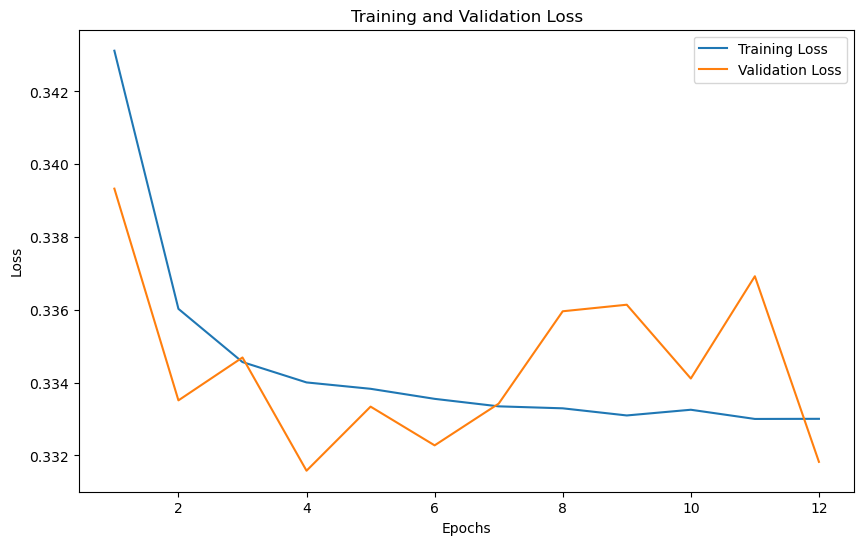

In [418]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [419]:
# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

Test Accuracy: 86.31


In [420]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

Test Precision: 81.82
Test Recall: 64.29
Test F1 score: 72.00


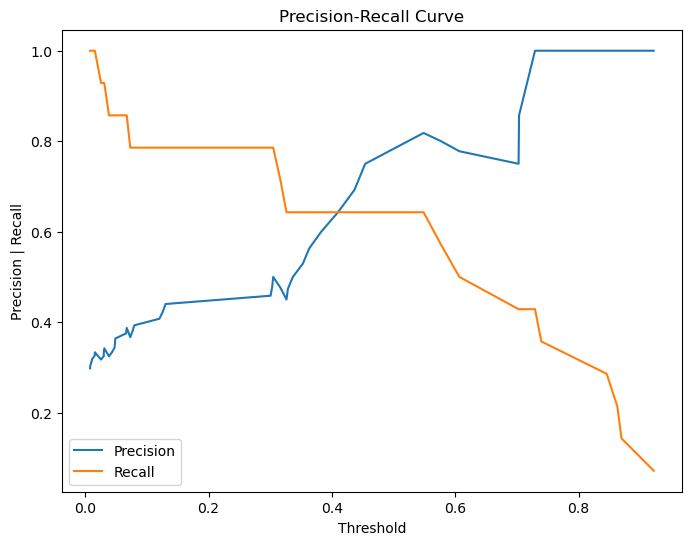

In [421]:
# Assign precisions, recalls, and the thresholds between two evaluation indicators
precisions, recalls, thresholds = precision_recall_curve(batch_y_test, outputs_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [422]:
# Calculate F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the index of the threshold with the maximum F1 score
best_threshold_index = np.argmax(f1_scores)

# Get the threshold from the index of the threshold
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')

Best Threshold: 0.5486189126968384


---
According to the loss plot above, more epochs are needed to fully train the model.

---

In [423]:
# Revise the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 6 
hidden_units2 = 4

In [424]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=0.01)

In [425]:
# Set the number of epochs
number_of_epochs = 20 # Increase the number of epochs

In [426]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/20], Train Loss: 0.4122
Epoch [1/20], Validation Loss: 0.4047
Epoch [2/20], Train Loss: 0.3903
Epoch [2/20], Validation Loss: 0.3797
Epoch [3/20], Train Loss: 0.3858
Epoch [3/20], Validation Loss: 0.3811
Epoch [4/20], Train Loss: 0.3843
Epoch [4/20], Validation Loss: 0.3777
Epoch [5/20], Train Loss: 0.3836
Epoch [5/20], Validation Loss: 0.3792
Epoch [6/20], Train Loss: 0.3621
Epoch [6/20], Validation Loss: 0.3488
Epoch [7/20], Train Loss: 0.3540
Epoch [7/20], Validation Loss: 0.3467
Epoch [8/20], Train Loss: 0.3536
Epoch [8/20], Validation Loss: 0.3544
Epoch [9/20], Train Loss: 0.3530
Epoch [9/20], Validation Loss: 0.3460
Epoch [10/20], Train Loss: 0.3533
Epoch [10/20], Validation Loss: 0.3482
Epoch [11/20], Train Loss: 0.3532
Epoch [11/20], Validation Loss: 0.3510
Epoch [12/20], Train Loss: 0.3534
Epoch [12/20], Validation Loss: 0.3466
Epoch [13/20], Train Loss: 0.3530
Epoch [13/20], Validation Loss: 0.3470
Epoch [14/20], Train Loss: 0.3531
Epoch [14/20], Validation L

Epoch [14/20], Validation Loss: 0.3355
Epoch [15/20], Train Loss: 0.3363
Epoch [15/20], Validation Loss: 0.3387
Epoch [16/20], Train Loss: 0.3358
Epoch [16/20], Validation Loss: 0.3398
Epoch [17/20], Train Loss: 0.3363
Epoch [17/20], Validation Loss: 0.3360
Epoch [18/20], Train Loss: 0.3364
Epoch [18/20], Validation Loss: 0.3385
Epoch [19/20], Train Loss: 0.3364
Epoch [19/20], Validation Loss: 0.3358
Epoch [20/20], Train Loss: 0.3359
Epoch [20/20], Validation Loss: 0.3364
Training & Validation Time: 199.45045399665833 seconds


In [427]:
# Initialize an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_losses = train_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [428]:
# Initialize an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_val_losses = val_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average train losses
    average_val_losses.append(average_epoch_val_loss)

In [429]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

20


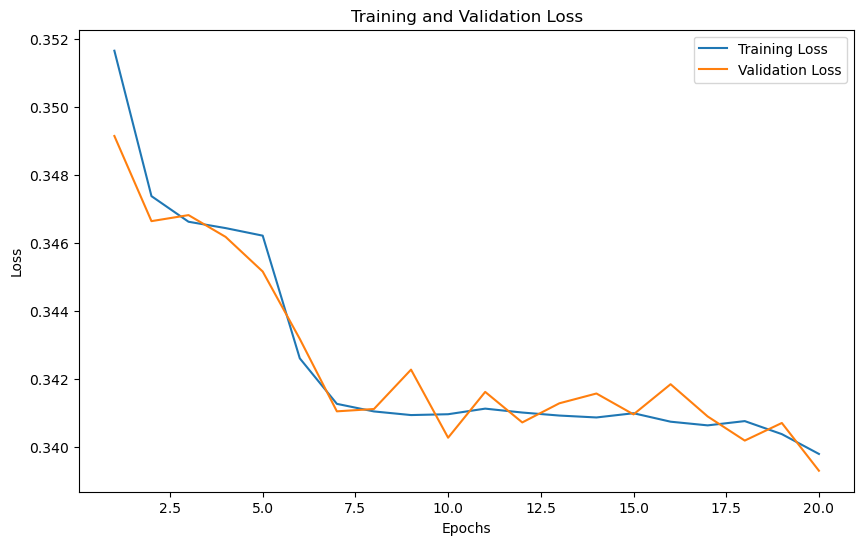

In [430]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [431]:
# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

Test Accuracy: 85.89


As the test accuracy decreased when applying 20 epochs, revert back to 12 epochs.

**Find the optimal learning rate**

- (4, 4) hidden units

**Using nested for loop**

In [480]:
# Define the revised MLP model class with 2 hidden layers from search
class reviesd_MLP_model_hidden_2(nn.Module):
    def __init__(self, input_size, hidden_units1, hidden_units2, output_size):
        super(reviesd_MLP_model_hidden_2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units1)
        self.fc2 = nn.Linear(hidden_units1, hidden_units2)
        self.fc3 = nn.Linear(hidden_units2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

In [481]:
# Revise the size and unit of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 4
hidden_units2 = 4

In [482]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=0.001)

In [483]:
# Set the number of epochs
number_of_epochs = 12

In [484]:
# Set the start timer
start_time = time.time()

# Define variables to store the best hyperparameters and accuracy
best_accuracy = 0.0
best_hyperparameters = {}

# Set the list of hyperparameters for grid search
learning_rates = [0.0001, 0.001, 0.01]

# Set the start timer
start_time = time.time()

# Nested loop for grid search
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    
    # Initialize baseline MLP model with current hyperparameters
    revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
    
    # Define optimizer and loss
    optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)
    criterion = nn.BCELoss()
    
    # List to store accuracies for each fold
    accuracies = []
    
    # Apply repeated stratified K-Fold cross-validator
    for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
        print(f'>>>Fold {fold+1}>>>')
        # Get the data for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]
    
        # Normalise the features in the training set
        # Define the scaler
        scaler = MinMaxScaler()
        # Fit on the X training   
        scaler.fit(X_train_fold)
        # Scale the X training
        X_train_fold_norm = scaler.transform(X_train_fold)
        # Scale the X validation
        X_val_fold_norm = scaler.transform(X_val_fold)
        # Change the data type back to torch with float32
        X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
        X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
        # Convert the train and valitdation sets into TensorDatasets
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
        # Apply DataLoader to training and validation sets
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Train for each fold
        for epoch in range(number_of_epochs):
            revised_hidden_2_mlp_model.train()
            
            for batch_X_train, batch_y_train in train_loader_fold:
                optimizer.zero_grad()
                outputs = revised_hidden_2_mlp_model(batch_X_train)
                loss = criterion(outputs, batch_y_train)
                loss.backward()
                optimizer.step()
        
        # Validation
        revised_hidden_2_mlp_model.eval()
            
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                predicted = (outputs_val > 0.5).float()
            
            # Calculate accuracy for this fold
            accuracy = (predicted == batch_y_val).sum().item() / len(batch_y_val)
            accuracies.append(accuracy)
            
    # Calculate average accuracy across folds for the current set of hyperparameters
    average_accuracy = sum(accuracies) / len(accuracies)
    
    # Check if this set of hyperparameters is the best so far
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_hyperparameters = {'learning_rate': lr}

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

print("Grid search completed.")
print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy:", best_accuracy)

# Print the elapsed time
print("Grid Search with nested for loops:", grid_time, "seconds")

Training model with learning rate: 0.0001
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.001
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with learning rate: 0.01
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Grid search completed.
Best hyperparameters: {'learning_rate': 0.001}
Best accuracy: 0.8252032520325203
Grid Search with nested for loops: 687.1815371513367 seconds


**Using Scikit-learn**

In [485]:
# Set the start timer
start_time = time.time()

# Define a parameter grid
param_grid = {
    'hidden_layer_sizes': [(4, 4)],
    'learning_rate_init': [0.0001, 0.001, 0.01]
}

# Create a MLPClassifier
hidden_2_mlp = MLPClassifier(batch_size=64, solver='adam', random_state=42)

# Perform grid search
grid_search = GridSearchCV(hidden_2_mlp, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Print the elapsed time
print("Grid Search with Scikit-learn:", grid_time, "seconds")

Best Parameters: {'hidden_layer_sizes': (4, 4), 'learning_rate_init': 0.01}
Best Score: 0.7881796905178486
Grid Search with Scikit-learn: 356.8350520133972 seconds


**Train the MLP model with (4, 4) hidden layers.**

Nested for loop: Best hyperparameters: {'learning_rate': 0.001}

In [486]:
# Revise the structure of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 4
hidden_units2 = 4
lr = 0.001

In [487]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)

In [488]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/12], Train Loss: 0.4871
Epoch [1/12], Validation Loss: 0.4416
Epoch [2/12], Train Loss: 0.4184
Epoch [2/12], Validation Loss: 0.3883
Epoch [3/12], Train Loss: 0.3833
Epoch [3/12], Validation Loss: 0.3747
Epoch [4/12], Train Loss: 0.3739
Epoch [4/12], Validation Loss: 0.3659
Epoch [5/12], Train Loss: 0.3656
Epoch [5/12], Validation Loss: 0.3567
Epoch [6/12], Train Loss: 0.3567
Epoch [6/12], Validation Loss: 0.3497
Epoch [7/12], Train Loss: 0.3511
Epoch [7/12], Validation Loss: 0.3455
Epoch [8/12], Train Loss: 0.3472
Epoch [8/12], Validation Loss: 0.3422
Epoch [9/12], Train Loss: 0.3449
Epoch [9/12], Validation Loss: 0.3418
Epoch [10/12], Train Loss: 0.3437
Epoch [10/12], Validation Loss: 0.3404
Epoch [11/12], Train Loss: 0.3431
Epoch [11/12], Validation Loss: 0.3412
Epoch [12/12], Train Loss: 0.3427
Epoch [12/12], Validation Loss: 0.3395
Fold 2:
Epoch [1/12], Train Loss: 0.3399
Epoch [1/12], Validation Loss: 0.3442
Epoch [2/12], Train Loss: 0.3396
Epoch [2/12], Validati

In [489]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [490]:
# Initialize an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_val_losses = val_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average train losses
    average_val_losses.append(average_epoch_val_loss)

In [491]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

12


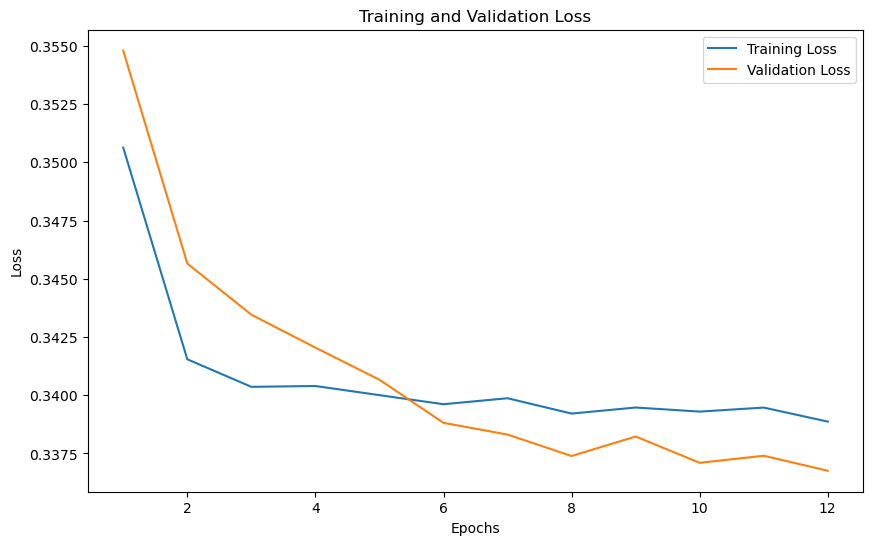

In [492]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [493]:
# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

Test Accuracy: 86.28


Scikit-learn: Best hyperparameters: {'learning_rate': 0.01}

In [494]:
# Revise the structure of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 4
hidden_units2 = 4
lr = 0.01

In [495]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)

In [496]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/12], Train Loss: 0.3866
Epoch [1/12], Validation Loss: 0.3499
Epoch [2/12], Train Loss: 0.3488
Epoch [2/12], Validation Loss: 0.3399
Epoch [3/12], Train Loss: 0.3470
Epoch [3/12], Validation Loss: 0.3504
Epoch [4/12], Train Loss: 0.3465
Epoch [4/12], Validation Loss: 0.3400
Epoch [5/12], Train Loss: 0.3457
Epoch [5/12], Validation Loss: 0.3395
Epoch [6/12], Train Loss: 0.3458
Epoch [6/12], Validation Loss: 0.3398
Epoch [7/12], Train Loss: 0.3447
Epoch [7/12], Validation Loss: 0.3427
Epoch [8/12], Train Loss: 0.3455
Epoch [8/12], Validation Loss: 0.3421
Epoch [9/12], Train Loss: 0.3450
Epoch [9/12], Validation Loss: 0.3543
Epoch [10/12], Train Loss: 0.3454
Epoch [10/12], Validation Loss: 0.3420
Epoch [11/12], Train Loss: 0.3446
Epoch [11/12], Validation Loss: 0.3417
Epoch [12/12], Train Loss: 0.3447
Epoch [12/12], Validation Loss: 0.3431
Fold 2:
Epoch [1/12], Train Loss: 0.3427
Epoch [1/12], Validation Loss: 0.3438
Epoch [2/12], Train Loss: 0.3416
Epoch [2/12], Validati

In [497]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [498]:
# Initialize an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_val_losses = val_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average train losses
    average_val_losses.append(average_epoch_val_loss)

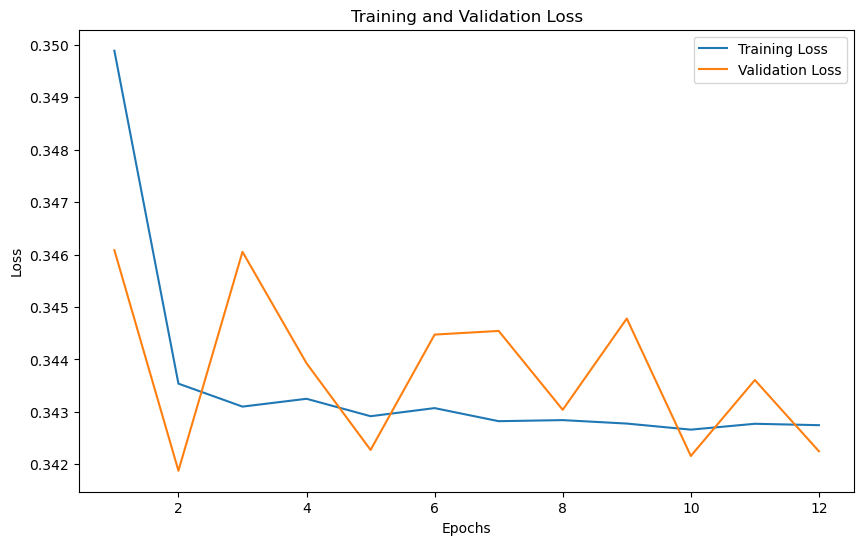

In [499]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [500]:
# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

Test Accuracy: 85.66


### 3.9.2. Find weight decay

**Select 6 for the first hidden units, 4 for the second hidden units and 0.01 learning rate**

**Using nested for loops**

In [435]:
# Reset the number of epochs
number_of_epochs = 12

In [436]:
# Revise the structure of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 6 
hidden_units2 = 4
lr = 0.01

In [437]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)

In [438]:
# Set the start timer
start_time = time.time()

# Define variables to store the best hyperparameters and accuracy
best_accuracy = 0.0
best_hyperparameters = {}

# Set the list of hyperparameters for grid search
weight_decays = [0.001, 0.01, 0.1, 0]

# Nested loop for gid search
for wd in weight_decays:
    print(f"Training model with weight decay: {wd}")
    
    # Initialize baseline MLP model with current hyperparameters
    revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
    
    # Define optimizer and criterion
    optimizer = torch.optim.Adam(revised_mlp_model.parameters(), lr=lr, weight_decay=wd)
    criterion = nn.BCELoss()
    
    # List to store accuracies for each fold
    accuracies = []
    
    # Apply repeated stratified K-Fold cross-validator
    for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
        print(f'>>>Fold {fold+1}>>>')
        # Get the data for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]
    
        # Normalise the features in the training set
        # Define the scaler
        scaler = MinMaxScaler()
        # Fit on the X training   
        scaler.fit(X_train_fold)
        # Scale the X training
        X_train_fold_norm = scaler.transform(X_train_fold)
        # Scale the X validation
        X_val_fold_norm = scaler.transform(X_val_fold)
        # Change the data type back to torch with float32
        X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
        X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
        # Convert the train and validation sets into TensorDatasets
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
        # Apply DataLoader to training and validation sets
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Train for each fold
        for epoch in range(number_of_epochs):
            revised_hidden_2_mlp_model.train()
            
            for batch_X_train, batch_y_train in train_loader_fold:
                optimizer.zero_grad()
                outputs = revised_hidden_2_mlp_model(batch_X_train)
                loss = criterion(outputs, batch_y_train)
                loss.backward()
                optimizer.step()
        
        # Validation
        revised_hidden_2_mlp_model.eval()
            
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                predicted = (outputs_val > 0.5).float()
            
            # Calculate accuracy for this fold
            accuracy = (predicted == batch_y_val).sum().item() / len(batch_y_val)
            accuracies.append(accuracy)
            
    # Calculate average accuracy across folds for the current set of hyperparameters
    average_accuracy = sum(accuracies) / len(accuracies)
    
    # Check if this set of hyperparameters is the best so far
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_hyperparameters = {'weight_decay': wd}

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time 
        
print("Grid search completed.")
print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy:", best_accuracy)

# Print the elapsed time
print("Grid Search with nested for loops:", grid_time, "seconds")

Training model with weight decay: 0.001
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with weight decay: 0.01
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with weight decay: 0.1
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Training model with weight decay: 0
>>>Fold 1>>>
>>>Fold 2>>>
>>>Fold 3>>>
>>>Fold 4>>>
>>>Fold 5>>>
>>>Fold 6>>>
Grid search completed.
Best hyperparameters: {'weight_decay': 0.1}
Best accuracy: 0.7479674796747968
Grid Search with nested for loops: 282.3353462219238 seconds


**Using Scikit-learn**

In [456]:
# Set the start timer
start_time = time.time()

# Define a parameter grid
param_grid = {
    'hidden_layer_sizes': [(6, 4)],
    'learning_rate_init': [0.01],
    'alpha': [0.001, 0.01, 0.1, 0]
}

# Create a MLPClassifier
hidden_2_mlp = MLPClassifier(batch_size=64, solver='adam', random_state=42)

# Perform grid search
grid_search = GridSearchCV(hidden_2_mlp, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
grid_time = end_time - start_time

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Print the elapsed time
print("Grid Search with Scikit-learn:", grid_time, "seconds")

Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (6, 4), 'learning_rate_init': 0.01}
Best Score: 0.7881796905178486
Grid Search with Scikit-learn: 457.9579539299011 seconds


### 3.9.3. Apply weight decay from search

Nested for loop: Best hyperparameters: {'weight_decay': 0.1}

In [465]:
# Revise the structure of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 6 
hidden_units2 = 4
lr = 0.01
wd = 0.1

In [466]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr, weight_decay=wd)

In [467]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/12], Train Loss: 0.5345
Epoch [1/12], Validation Loss: 0.5351
Epoch [2/12], Train Loss: 0.5353
Epoch [2/12], Validation Loss: 0.5299
Epoch [3/12], Train Loss: 0.5351
Epoch [3/12], Validation Loss: 0.5368
Epoch [4/12], Train Loss: 0.5353
Epoch [4/12], Validation Loss: 0.5395
Epoch [5/12], Train Loss: 0.5351
Epoch [5/12], Validation Loss: 0.5430
Epoch [6/12], Train Loss: 0.5353
Epoch [6/12], Validation Loss: 0.5365
Epoch [7/12], Train Loss: 0.5351
Epoch [7/12], Validation Loss: 0.5444
Epoch [8/12], Train Loss: 0.5354
Epoch [8/12], Validation Loss: 0.5342
Epoch [9/12], Train Loss: 0.5353
Epoch [9/12], Validation Loss: 0.5334
Epoch [10/12], Train Loss: 0.5353
Epoch [10/12], Validation Loss: 0.5344
Epoch [11/12], Train Loss: 0.5352
Epoch [11/12], Validation Loss: 0.5360
Epoch [12/12], Train Loss: 0.5353
Epoch [12/12], Validation Loss: 0.5322
Fold 2:
Epoch [1/12], Train Loss: 0.5352
Epoch [1/12], Validation Loss: 0.5328
Epoch [2/12], Train Loss: 0.5352
Epoch [2/12], Validati

In [468]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [469]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

In [470]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

12


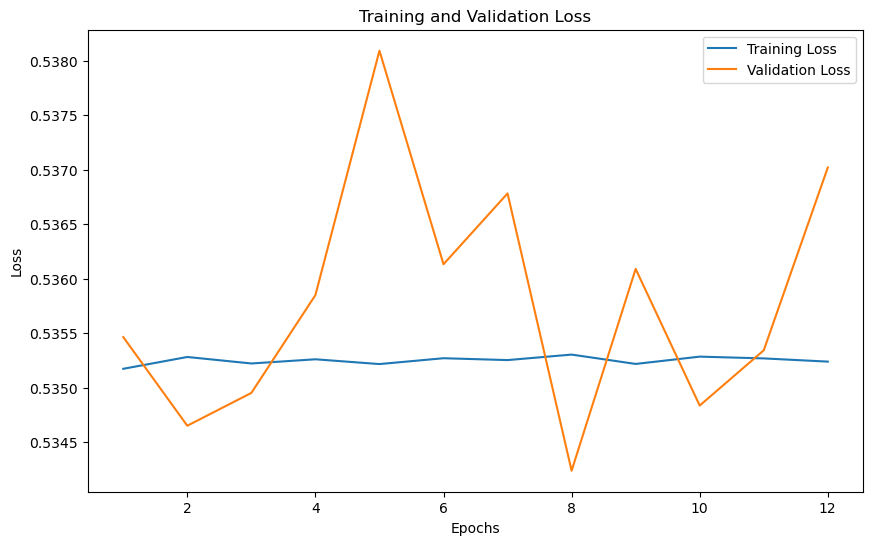

In [471]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [472]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 78.93
Test Time: 0.7271866798400879 seconds


Scikit-learn: Best Parameters: {'alpha': 0.001}

In [473]:
# Revise the structure of the baseline of MLP model
input_size = 10
output_size = 1
hidden_units1 = 6 
hidden_units2 = 4
lr = 0.01
wd = 0.001

In [474]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr, weight_decay=wd)

In [475]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch [1/12], Train Loss: 0.4072
Epoch [1/12], Validation Loss: 0.3731
Epoch [2/12], Train Loss: 0.3543
Epoch [2/12], Validation Loss: 0.3453
Epoch [3/12], Train Loss: 0.3481
Epoch [3/12], Validation Loss: 0.3379
Epoch [4/12], Train Loss: 0.3472
Epoch [4/12], Validation Loss: 0.3389
Epoch [5/12], Train Loss: 0.3453
Epoch [5/12], Validation Loss: 0.3391
Epoch [6/12], Train Loss: 0.3447
Epoch [6/12], Validation Loss: 0.3528
Epoch [7/12], Train Loss: 0.3452
Epoch [7/12], Validation Loss: 0.3364
Epoch [8/12], Train Loss: 0.3434
Epoch [8/12], Validation Loss: 0.3340
Epoch [9/12], Train Loss: 0.3435
Epoch [9/12], Validation Loss: 0.3461
Epoch [10/12], Train Loss: 0.3430
Epoch [10/12], Validation Loss: 0.3458
Epoch [11/12], Train Loss: 0.3423
Epoch [11/12], Validation Loss: 0.3351
Epoch [12/12], Train Loss: 0.3419
Epoch [12/12], Validation Loss: 0.3400
Fold 2:
Epoch [1/12], Train Loss: 0.3412
Epoch [1/12], Validation Loss: 0.3415
Epoch [2/12], Train Loss: 0.3405
Epoch [2/12], Validati

In [476]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [477]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

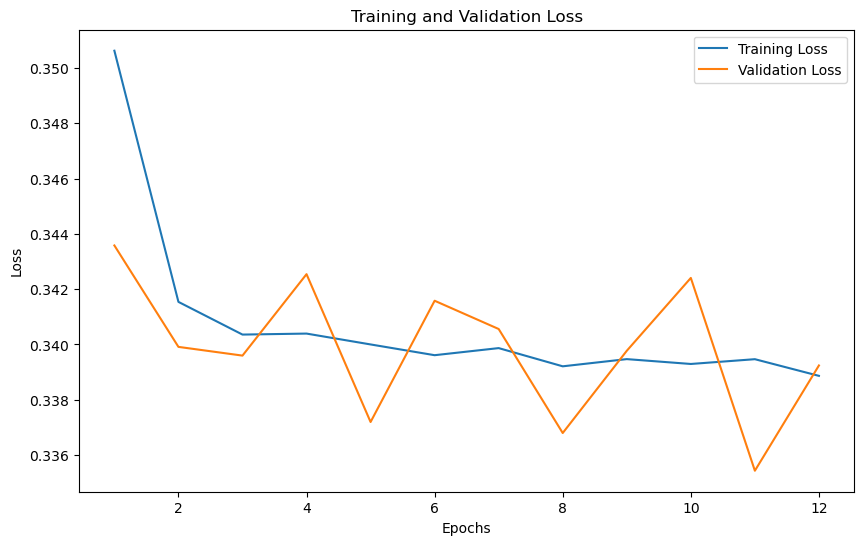

In [478]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [479]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.28
Test Time: 0.6651968955993652 seconds


### 3.9.4. Apply learning rate scheduler

---
Although the model with 4 and 4 hidden units, a learning rate of 0.001 without weight decay, and trained for 50 epochs achieved the highest accuracy among the other models, it is highly likely that it was overfitting because early stopping was not applied.
<br>
Therefore, since the model with 6 and 4 units in the hidden layers, a learning rate of 0.01 without weight decay, has the second-highest accuracy after decreasing epochs and performing grid search, continue using this structure for the learning rate scheduler.

---

- STEP LR

In [501]:
# Revise the structure of the MLP model
input_size = 10
output_size = 1
hidden_units1 = 6 
hidden_units2 = 4
lr = 0.01

In [502]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

In [503]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Apply the learning rate scheduler
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print(f"Epoch {epoch + 1}: Adam lr {before_lr:.4f} -> {after_lr:.4f}")
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch 1: Adam lr 0.0100 -> 0.0100
Epoch [1/12], Train Loss: 0.5192
Epoch [1/12], Validation Loss: 0.5166
Epoch 2: Adam lr 0.0100 -> 0.0100
Epoch [2/12], Train Loss: 0.5165
Epoch [2/12], Validation Loss: 0.5164
Epoch 3: Adam lr 0.0100 -> 0.0100
Epoch [3/12], Train Loss: 0.5165
Epoch [3/12], Validation Loss: 0.5164
Epoch 4: Adam lr 0.0100 -> 0.0100
Epoch [4/12], Train Loss: 0.5165
Epoch [4/12], Validation Loss: 0.5168
Epoch 5: Adam lr 0.0100 -> 0.0100
Epoch [5/12], Train Loss: 0.5165
Epoch [5/12], Validation Loss: 0.5164
Epoch 6: Adam lr 0.0100 -> 0.0100
Epoch [6/12], Train Loss: 0.5164
Epoch [6/12], Validation Loss: 0.5165
Epoch 7: Adam lr 0.0100 -> 0.0100
Epoch [7/12], Train Loss: 0.5165
Epoch [7/12], Validation Loss: 0.5166
Epoch 8: Adam lr 0.0100 -> 0.0100
Epoch [8/12], Train Loss: 0.5165
Epoch [8/12], Validation Loss: 0.5164
Epoch 9: Adam lr 0.0100 -> 0.0100
Epoch [9/12], Train Loss: 0.5164
Epoch [9/12], Validation Loss: 0.5166
Epoch 10: Adam lr 0.0100 -> 0.0090
Epoch [10/12

In [504]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [505]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

In [506]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

12


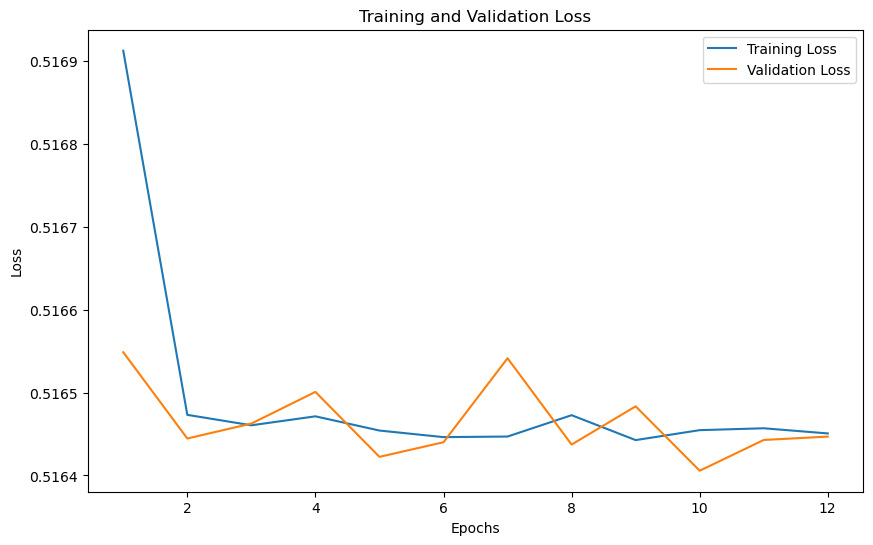

In [507]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [508]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 78.93
Test Time: 0.6705265045166016 seconds


- EXPONENTIAL LR

In [509]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

In [510]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Apply the learning rate scheduler
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print(f"Epoch {epoch + 1}: Adam lr {before_lr:.4f} -> {after_lr:.4f}")
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch 1: Adam lr 0.0100 -> 0.0099
Epoch [1/12], Train Loss: 0.3863
Epoch [1/12], Validation Loss: 0.3478
Epoch 2: Adam lr 0.0099 -> 0.0098
Epoch [2/12], Train Loss: 0.3532
Epoch [2/12], Validation Loss: 0.3421
Epoch 3: Adam lr 0.0098 -> 0.0097
Epoch [3/12], Train Loss: 0.3457
Epoch [3/12], Validation Loss: 0.3421
Epoch 4: Adam lr 0.0097 -> 0.0096
Epoch [4/12], Train Loss: 0.3428
Epoch [4/12], Validation Loss: 0.3396
Epoch 5: Adam lr 0.0096 -> 0.0095
Epoch [5/12], Train Loss: 0.3418
Epoch [5/12], Validation Loss: 0.3342
Epoch 6: Adam lr 0.0095 -> 0.0094
Epoch [6/12], Train Loss: 0.3400
Epoch [6/12], Validation Loss: 0.3353
Epoch 7: Adam lr 0.0094 -> 0.0093
Epoch [7/12], Train Loss: 0.3405
Epoch [7/12], Validation Loss: 0.3337
Epoch 8: Adam lr 0.0093 -> 0.0092
Epoch [8/12], Train Loss: 0.3390
Epoch [8/12], Validation Loss: 0.3360
Epoch 9: Adam lr 0.0092 -> 0.0091
Epoch [9/12], Train Loss: 0.3384
Epoch [9/12], Validation Loss: 0.3349
Epoch 10: Adam lr 0.0091 -> 0.0090
Epoch [10/12

In [511]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [512]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

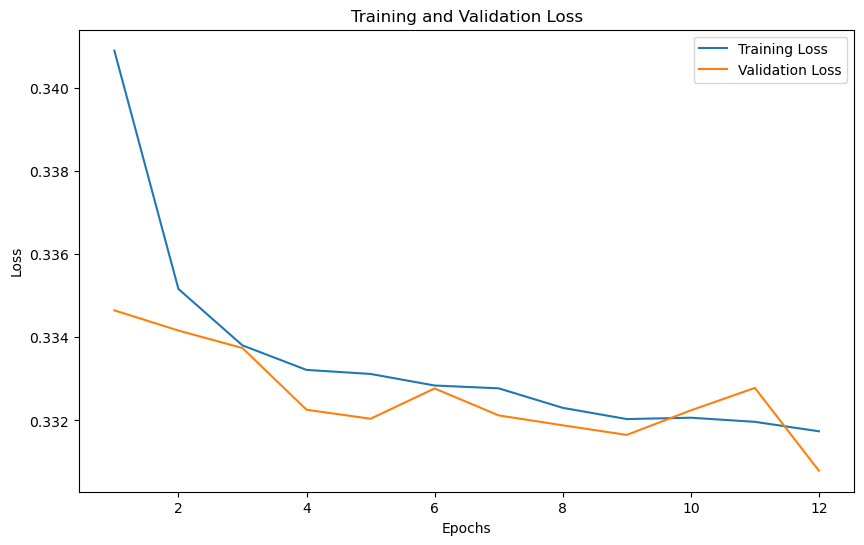

In [513]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [514]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.31
Test Time: 0.6761643886566162 seconds


- LINEAR LR

In [515]:
# Set the MLP model, loss function and optimizer
revised_hidden_2_mlp_model = reviesd_MLP_model_hidden_2(input_size, hidden_units1, hidden_units2, output_size)
criterion = torch.nn.BCELoss() # For binary classfication
optimizer = torch.optim.Adam(revised_hidden_2_mlp_model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.1, total_iters=60)

In [516]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
# Apply repeated stratified K-Fold cross-validator
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold+1}:')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Normalise the features in the training set
    # Define the scaler
    scaler = MinMaxScaler()
    # Fit on the X training   
    scaler.fit(X_train_fold)
    # Scale the X training
    X_train_fold_norm = scaler.transform(X_train_fold)
    # Scale the X validation
    X_val_fold_norm = scaler.transform(X_val_fold)
    # Change the data type back to torch with float32
    X_train_fold = torch.tensor(X_train_fold_norm, dtype=torch.float32)
    X_val_fold = torch.tensor(X_val_fold_norm, dtype=torch.float32)
    
    # Convert the train and valitdation sets into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Apply DataLoader to training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

    # Train for each fold
    for epoch in range(number_of_epochs):
        revised_hidden_2_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = revised_hidden_2_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            # The total loss for all samples in that batch
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        # The average loss for the epoch
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Apply the learning rate scheduler
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print(f"Epoch {epoch + 1}: Adam lr {before_lr:.4f} -> {after_lr:.4f}")
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        revised_hidden_2_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = revised_hidden_2_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                # The total loss for all samples in that batch
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        # The average loss for the epoch
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")

Fold 1:
Epoch 1: Adam lr 0.0010 -> 0.0011
Epoch [1/12], Train Loss: 0.4561
Epoch [1/12], Validation Loss: 0.3971
Epoch 2: Adam lr 0.0011 -> 0.0013
Epoch [2/12], Train Loss: 0.3885
Epoch [2/12], Validation Loss: 0.3780
Epoch 3: Adam lr 0.0013 -> 0.0014
Epoch [3/12], Train Loss: 0.3741
Epoch [3/12], Validation Loss: 0.3642
Epoch 4: Adam lr 0.0014 -> 0.0016
Epoch [4/12], Train Loss: 0.3639
Epoch [4/12], Validation Loss: 0.3555
Epoch 5: Adam lr 0.0016 -> 0.0017
Epoch [5/12], Train Loss: 0.3543
Epoch [5/12], Validation Loss: 0.3466
Epoch 6: Adam lr 0.0017 -> 0.0019
Epoch [6/12], Train Loss: 0.3467
Epoch [6/12], Validation Loss: 0.3451
Epoch 7: Adam lr 0.0019 -> 0.0020
Epoch [7/12], Train Loss: 0.3430
Epoch [7/12], Validation Loss: 0.3376
Epoch 8: Adam lr 0.0020 -> 0.0022
Epoch [8/12], Train Loss: 0.3412
Epoch [8/12], Validation Loss: 0.3376
Epoch 9: Adam lr 0.0022 -> 0.0023
Epoch [9/12], Train Loss: 0.3399
Epoch [9/12], Validation Loss: 0.3379
Epoch 10: Adam lr 0.0023 -> 0.0025
Epoch [10/12

In [517]:
# Make an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_losses = train_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [518]:
# Make an empty list to store average validation losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch
    # Select every N-th element from the train_losses list starting from the index of epoch
    epoch_val_losses = val_losses[epoch::number_of_epochs] # Slice 
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average validation losses
    average_val_losses.append(average_epoch_val_loss)

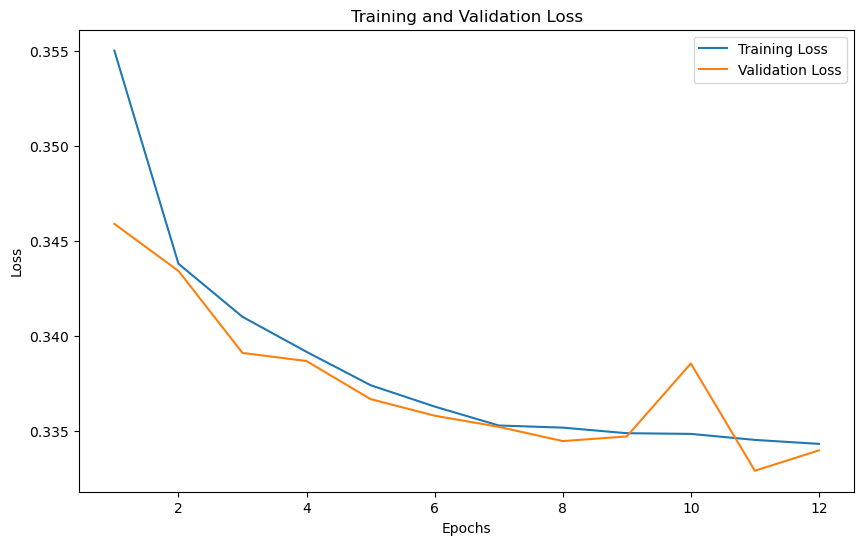

In [519]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [520]:
# Set the start timer
start_time = time.time()

# Test the model on the test set
revised_hidden_2_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test)
        # Change the data type back to torch with float32
        batch_X_test = torch.tensor(batch_X_test_norm, dtype=torch.float32)
        # Feed forward
        outputs_test = revised_hidden_2_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
test_time = end_time - start_time

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

# Print the elapsed time
print("Test Time:", test_time, "seconds")

Test Accuracy: 86.32
Test Time: 0.6851530075073242 seconds


### 3.10. Final MLP model selection

---
As the MLP model with two hidden layers (6 units for the first hidden layer and 4 units for the second layer) with a learning rate of 0.01 but applying linear learning rate scheduler and without weight decay has the highest test accuracy from search, save it as the final MLP model.

---

### 3.11. Save the final MLP model

In [521]:
# Save the trained model
torch.save(revised_hidden_2_mlp_model.state_dict(), 'best_mlp_model.pth')

### 3.12. Save the test set for the MLP model

In [522]:
# Save the X_test from all batches
X_test_batches = []

with torch.no_grad():
    for batch_X_test, _ in test_loader:
        # Scale the X test
        batch_X_test_norm = scaler.transform(batch_X_test.numpy())
        X_test_batches.append(torch.tensor(batch_X_test_norm, dtype=torch.float32))

# Concatenate all batches into a single tensor
X_test_for_MLP = torch.cat(X_test_batches, dim=0)

In [523]:
# Check the number of X test samples
len(X_test_for_MLP)

33007

In [524]:
# Save the X_test
torch.save(X_test_for_MLP, 'X_test_for_MLP.pth')

In [525]:
# Save the y_test from all batches
y_test_batches = []

with torch.no_grad():
    for _, batch_y_test in test_loader:
        y_test_batches.append(batch_y_test)

# Concatenate all batches into a single tensor
y_test_for_MLP = torch.cat(y_test_batches, dim=0)

In [526]:
# Check the number of y test samples
len(y_test_for_MLP)

33007

In [527]:
# Save the y_test
torch.save(y_test_for_MLP, 'y_test_for_MLP.pth')

### 4. Support Vector Machines(SVM)

### 4.1. Define the baseline SVM model

In [230]:
#Create the baseline SVM classifier
baseline_svm_model = svm.SVC(kernel='rbf', cache_size=2000) # Default kernel

In [231]:
# Train the baseline SVM model

# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy): # Apply the same variable 'kfold' used in the MLP model above
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the normalized training fold
    baseline_svm_model.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = baseline_svm_model.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8571958766009983
Training and Validation Time: 1149.4285714626312 seconds


In [232]:
# Check its gamma value
gamma_value = baseline_svm_model.gamma

print("The value of gamma:", gamma_value)

The value of gamma: scale


In [233]:
# Check its regularisation C value
C_value = baseline_svm_model.C

print("The value of C:", C_value)

The value of C: 1.0


In [234]:
# Check its iteration
actual_iter_used = baseline_svm_model.n_iter_

print("The actual number of iterations used:", actual_iter_used)

The actual number of iterations used: [49821]


In [235]:
# Import the library to check accuracy
from sklearn.metrics import accuracy_score

In [236]:
# Check the test accuracy
X_test_numpy_norm = scaler.transform(X_test_numpy)
test_predictions = baseline_svm_model.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 85.71


In [237]:
# Check the support vectors for each class
n_support_per_class = baseline_svm_model.n_support_

print(f'The number of support vectors for class 1: {n_support_per_class[0]}')
print(f'The number of support vectors for class 2: {n_support_per_class[1]}')

The number of support vectors for class 1: 14895
The number of support vectors for class 2: 14566


In [238]:
# Check its evaluation metrics
print(classification_report(y_test_numpy,test_predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     26052
         1.0       0.77      0.45      0.57      6955

    accuracy                           0.86     33007
   macro avg       0.82      0.71      0.74     33007
weighted avg       0.85      0.86      0.84     33007



In [239]:
#Import confusion matrix to get True Positive(TP), True Negative(TN), False Positive(FP), and False Negative(FN)
from sklearn.metrics import confusion_matrix

In [240]:
# Calculate TP, TN, FP, FN
matrix = confusion_matrix(y_test_numpy, test_predictions)

TP = matrix[1, 1]
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1_score)

Test Precision: 0.7739960822722821
Test Recall: 0.45449317038102083
Test F1 Score: 0.5726968022465803


In [241]:
# Import the library to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

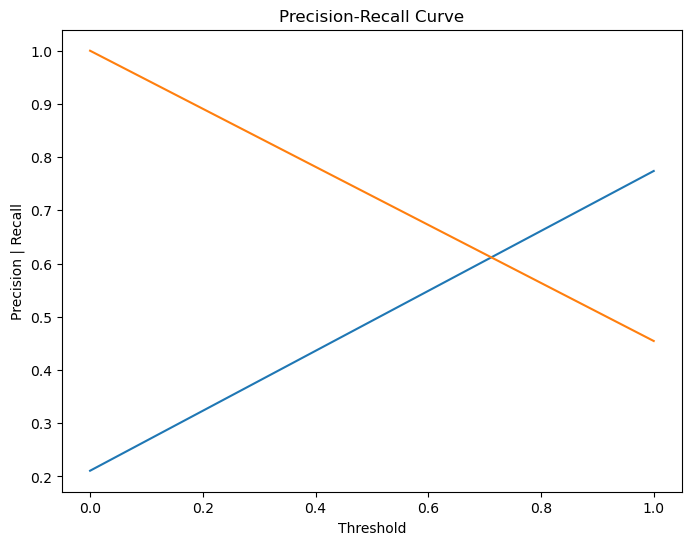

In [242]:
# Assign precisions, recalls, and the thresholds between two indicators
precisions, recalls, thresholds = precision_recall_curve(y_test_numpy, test_predictions)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.show()

### 4.2. Check different kernels and its accuracy

In [243]:
# Make a function to test a SVM model with a different kernel
def train_and_validate_SVM(X_train, y_train, kernel=''):
    # Initialize SVM classifier with the specified kernel
    svm_model = svm.SVC(kernel=kernel)

    # Record the start time
    start_time = time.time()

    # List to store scores
    all_scores = []

    # Loop through each repetition of k-fold
    for train_index, val_index in kfold.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Normalize X_train_fold
        scaler = MinMaxScaler()
        X_train_fold_norm = scaler.fit_transform(X_train_fold)

        # Fit the SVM model on the normalized training fold
        svm_model.fit(X_train_fold_norm, y_train_fold)

        # Evaluate on the validation fold
        X_val_fold_norm = scaler.transform(X_val_fold)
        score = svm_model.score(X_val_fold_norm, y_val_fold)
        all_scores.append(score)

    validation_accuracy = sum(all_scores) / len(all_scores)

    # Record the end time
    end_time = time.time()

    # Calculate the training time
    training_time = end_time - start_time

    return validation_accuracy, training_time

- Linear kernel

In [244]:
# Get the validation accuracy of the linear SVM model
validation_accuracy, training_time = train_and_validate_SVM(X_train_numpy, y_train_numpy, kernel='linear')
print("Validation Accuracy:", validation_accuracy)
print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8297772425337242
Training and Validation Time: 723.4703397750854 seconds


- Polynomial kernel

In [245]:
# Get the validation accuracy of the poly SVM model
validation_accuracy, training_time = train_and_validate_SVM(X_train_numpy, y_train_numpy, kernel='poly')
print("Validation Accuracy:", validation_accuracy)
print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8546850265476001
Training and Validation Time: 925.5018105506897 seconds


- Sigmoid kernel

In [246]:
# Get the validation accuracy of the sigmoid SVM model
validation_accuracy, training_time = train_and_validate_SVM(X_train_numpy, y_train_numpy, kernel='sigmoid')
print("Validation Accuracy:", validation_accuracy)
print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.6810614495519856
Training and Validation Time: 1144.6092631816864 seconds


---
The radial basis function ('rbf') kernel will be used for the SVM model since it has achieved the highest accuracy without hyperparameter tuning.

---

### 4.3. Check different iteration and its accuracy

---
As training took a lot of time, set the maximum iteration for the SVM model.

---

- Set the maximum iteration as 10,000

In [247]:
#Create the baseline SVM classifier
baseline_svm_model = svm.SVC(kernel='rbf', cache_size=2000, max_iter=10000)

In [248]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy):
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    baseline_svm_model.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = baseline_svm_model.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.5543941769486544
Training and Validation Time: 656.4557590484619 seconds


In [249]:
# Check the iteration
actual_iter_used = baseline_svm_model.n_iter_

print("The actual number of iterations used:", actual_iter_used)

The actual number of iterations used: [10000]


In [250]:
# Check the test accuracy
X_test_numpy_norm = scaler.transform(X_test_numpy)
test_predictions = baseline_svm_model.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 56.51


- Set the maximum iteration as 5,000

In [251]:
#Create the baseline SVM classifier
baseline_svm_model = svm.SVC(kernel='rbf', cache_size=2000, max_iter=5000)

In [252]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy):
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    baseline_svm_model.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = baseline_svm_model.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.6442545842895772
Training and Validation Time: 395.31083846092224 seconds


In [253]:
X_test_numpy_norm = scaler.transform(X_test_numpy)
test_predictions = baseline_svm_model.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 47.47


- Set the maximum iteration as 1,000

In [384]:
#Create the baseline SVM classifier
baseline_svm_model = svm.SVC(kernel='rbf', cache_size=2000, max_iter=1000)

In [385]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy):
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    baseline_svm_model.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = baseline_svm_model.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.6964863247669038
Training and Validation Time: 156.1930456161499 seconds


In [386]:
# Check the test accuracy
X_test_numpy_norm = scaler.transform(X_test_numpy)
test_predictions = baseline_svm_model.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 73.20


### 4.4. Find the optimal parameters for the SVM model

---
Considering training takes a lot of time, a halving grid search is performed with the maximum iteration set to 1000.

---

**Halving grid search**

In [259]:
# Import the library
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [260]:
# Define your SVM model
baseline_svm_model = svm.SVC(kernel='rbf', cache_size=2000, max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [1, 10, 100],
    'gamma': [1e-1, 1e-2, 1e-3]
}

# Initialize HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(estimator=baseline_svm_model, param_grid=param_grid, cv=kfold, scoring='accuracy', factor=2, random_state=42, resource='n_samples')

# Measure the start time
start_time = time.time()

# Perform the halving grid search
halving_grid_search.fit(X_train_numpy, y_train_numpy)  # Assuming you have training data X_train and corresponding labels y_train

# Measure the end time
end_time = time.time()

# Calculate the total time
total_time = end_time - start_time

# Get the best parameters and the best score
best_params = halving_grid_search.best_params_
best_score = halving_grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)
print("Total time taken:", total_time, "seconds")

Best parameters: {'C': 100, 'gamma': 0.1}
Best score: 0.7873265466884809
Total time taken: 1364.2097392082214 seconds


---
Apply manual search for experiments.

---

**Manual search**

- Set gamma to 'auto' (default is 'scale').

In [387]:
#Create the SVM classifier
gamma_auto_svm_model = svm.SVC(kernel='rbf', gamma='auto', cache_size=2000)

In [388]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy): # Apply the same variable 'kfold' used in the MLP model above
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    gamma_auto_svm_model.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = gamma_auto_svm_model.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8439978186280079
Training and Validation Time: 2155.2923278808594 seconds


In [389]:
# Check the test accuracy
test_predictions = gamma_auto_svm_model.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 84.57


In [409]:
# Check the iteration
actual_iter_used = gamma_auto_svm_model.n_iter_

print("The actual number of iterations used:", actual_iter_used)

The actual number of iterations used: [25112]


### 4.5. Apply the optimal parameters for the SVM model

---
Parameters found through halving grid search are applied without setting a maximum iteration.

---

In [391]:
revised_svm_model = svm.SVC(kernel='rbf', cache_size=2000, C=100, gamma=0.1)

In [392]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy):
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    revised_svm_model.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = revised_svm_model.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8565141978534694
Training and Validation Time: 1352.1223018169403 seconds


In [393]:
# Check the test accuracy
test_predictions = revised_svm_model.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 85.73


In [394]:
# Calculate TP, TN, FP, FN
matrix = confusion_matrix(y_test_numpy, test_predictions)

TP = matrix[1, 1]
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1_score)

Test Precision: 0.7786051129312485
Test Recall: 0.45104241552839686
Test F1 Score: 0.5711944646758922


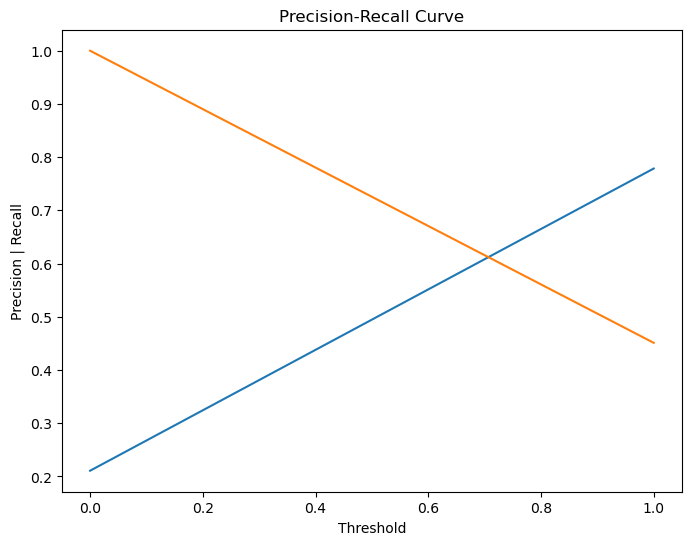

In [395]:
# Assign precisions, recalls, and the thresholds between two indicators
precisions, recalls, thresholds = precision_recall_curve(y_test_numpy, test_predictions)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.show()

In [396]:
# Check the support vectors for each class
n_support_per_class = revised_svm_model.n_support_

print(f'The number of support vectors for class 1: {n_support_per_class[0]}')
print(f'The number of support vectors for class 2: {n_support_per_class[1]}')

The number of support vectors for class 1: 14415
The number of support vectors for class 2: 14288


In [410]:
# Check the iteration
actual_iter_used = revised_svm_model.n_iter_

print("The actual number of iterations used:", actual_iter_used)

The actual number of iterations used: [460215]


### 4.6. Apply LinearSVC from scikit-learn

---
LinearSVC is used to compare the speed between using SVC and using LinearSVC. 

---

In [440]:
# Import the library
from sklearn.svm import LinearSVC

In [441]:
# Define the linearSVC model
baseline_linSVC = LinearSVC(random_state=42)

In [442]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy):
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    baseline_linSVC.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = baseline_linSVC.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8289365054117718
Training and Validation Time: 12.522352695465088 seconds


In [443]:
# Check the test accuracy
test_predictions = baseline_linSVC.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 82.87


- Change the regularisation to L1

In [274]:
# Change the regularisation to L1
l1_linSVC = LinearSVC(penalty='l1', dual=False, random_state=42)

In [275]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy):
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    l1_linSVC.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = l1_linSVC.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8289365054117718
Training and Validation Time: 4.127877235412598 seconds


In [276]:
# Check the test accuracy
test_predictions = l1_linSVC.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 82.87


- Change the loss to hinge(the standard SVM loss)

In [277]:
# Change the loss to hinge (This time, regularisation is L2)
hinge_linSVC = LinearSVC(loss='hinge', random_state=42)

In [278]:
# Record the start time
start_time = time.time()

# List to store scores
all_scores = []

# Loop through each repetition of k-fold
for train_index, val_index in kfold.split(X_train_numpy, y_train_numpy):
    X_train_fold, X_val_fold = X_train_numpy[train_index], X_train_numpy[val_index]
    y_train_fold, y_val_fold = y_train_numpy[train_index], y_train_numpy[val_index]

    # Normalize X_train_fold within the loop
    scaler = MinMaxScaler()
    X_train_fold_norm = scaler.fit_transform(X_train_fold)

    # Fit the pipeline on the normalized training fold
    hinge_linSVC.fit(X_train_fold_norm, y_train_fold)

    # Evaluate on the validation fold
    X_val_fold_norm = scaler.transform(X_val_fold)
    score = hinge_linSVC.score(X_val_fold_norm, y_val_fold)
    all_scores.append(score)
    
validation_accuracy = sum(all_scores) / len(all_scores)
    
print("Validation Accuracy:", validation_accuracy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 0.8297052875548183
Training and Validation Time: 1.4113171100616455 seconds


In [279]:
# Check the test accuracy
test_predictions = hinge_linSVC.predict(X_test_numpy_norm)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 83.06


### 4.7. Find the optimal parameters for the LinearSVC

**Grid search**

---
C, which is the regularisation parameter, is the only parameter to adjust.

---

In [280]:
baseline_linSVC = LinearSVC(random_state=42)

In [281]:
param_grid = {
    'C': [0.01, 0, 1, 10, 100],
}

grid = GridSearchCV(baseline_linSVC, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=kfold)
grid.fit(X_train_numpy, y_train_numpy)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)


The best parameters are {'C': 0.01} with a score of 0.76


**Manual Search**

In [282]:
# Make the training and validation function
def train_and_validate_linearSVC(model, X_train, y_train, kfold):
    # Record the start time
    start_time = time.time()

    # List to store scores
    all_scores = []

    # Loop through each repetition of k-fold
    for train_index, val_index in kfold.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Normalize X_train_fold within the loop
        scaler = MinMaxScaler()
        X_train_fold_norm = scaler.fit_transform(X_train_fold)

        # Fit the model on the normalized training fold
        model.fit(X_train_fold_norm, y_train_fold)

        # Evaluate on the validation fold
        X_val_fold_norm = scaler.transform(X_val_fold)
        score = model.score(X_val_fold_norm, y_val_fold)
        all_scores.append(score)
    
    validation_accuracy = np.mean(all_scores)
    
    # Record the end time
    end_time = time.time()

    # Calculate the training time
    training_time = end_time - start_time

    return validation_accuracy, training_time

In [283]:
# Make the test function
def get_test_accuracy(model, X_test, y_test):
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    return test_accuracy

- C: 0.001

In [284]:
# Define the model
second_linSVC = LinearSVC(random_state=42, C=0.001)

In [285]:
# Train and validate
validation_accuracy, training_time = train_and_validate_linearSVC(second_linSVC, X_train_numpy, y_train_numpy, kfold)
print(f"Validation Accuracy: {validation_accuracy*100:.2f}")
print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 82.15
Training and Validation Time: 0.9512135982513428 seconds


In [286]:
# Test
test_accuracy = get_test_accuracy(second_linSVC, X_test_numpy_norm, y_test_numpy)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 82.30


### 4.8. Apply the optimal parameters for the LinearSVC

Grid search: {'C': 0.01}

- With squared hinge loss

In [444]:
# Define the model
revised_linSVC = LinearSVC(random_state=42, C=0.01)

In [445]:
# Train and validate
validation_accuracy, training_time = train_and_validate_linearSVC(revised_linSVC, X_train_numpy, y_train_numpy, kfold)
print(f"Validation Accuracy: {validation_accuracy*100:.2f}")
print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 82.84
Training and Validation Time: 1.3222966194152832 seconds


In [446]:
# Test
test_accuracy = get_test_accuracy(revised_linSVC, X_test_numpy_norm, y_test_numpy)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 82.80


- With hinge loss

In [447]:
# Define the model
hinge_revised_linSVC = LinearSVC(loss='hinge', random_state=42, C=0.01)

In [448]:
# Train and validate
validation_accuracy, training_time = train_and_validate_linearSVC(hinge_revised_linSVC, X_train_numpy, y_train_numpy, kfold)
print(f"Validation Accuracy: {validation_accuracy*100:.2f}")
print("Training and Validation Time:", training_time, "seconds")

Validation Accuracy: 79.37
Training and Validation Time: 1.328345537185669 seconds


In [449]:
# Test
test_accuracy = get_test_accuracy(hinge_revised_linSVC, X_test_numpy_norm, y_test_numpy)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Test Accuracy: 79.41


### 4.9. Final SVM model selection

---
As the SVM model with the code 'SVC', using the rbf kernel, C of 100, and gamma of 0.1, has the highest test accuracy, define the final SVM model and save it.

---

**Plot the learning curve of the final SVM model**

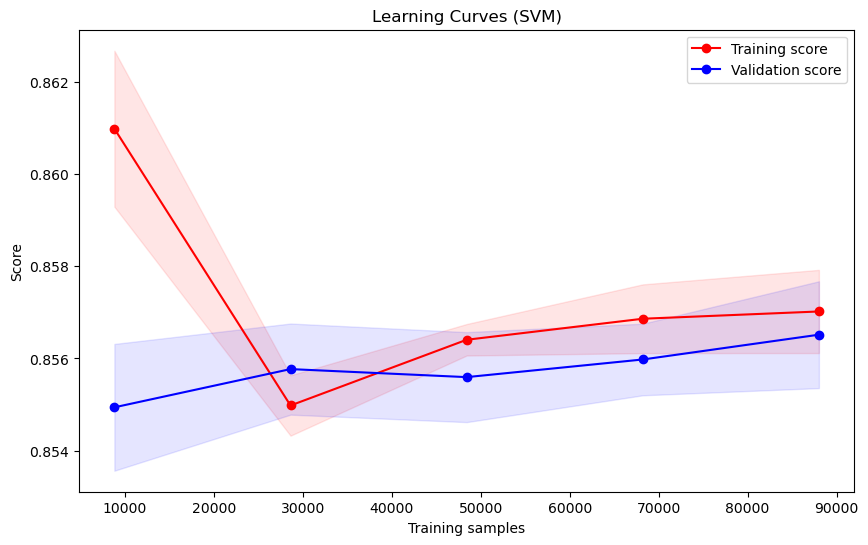

In [528]:
#Import libraries
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Create the pipeline with normalization
final_svm_model = make_pipeline(MinMaxScaler(), SVC(kernel='rbf', cache_size=2000, C=100, gamma=0.1))

# Define the title of the plot
title = "Learning Curves (SVM)"

# Specify the number of training samples
train_sizes = np.linspace(0.1, 1.0, 5)

# Plot the learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(final_svm_model, X_train_numpy, y_train_numpy, cv=kfold, n_jobs=-1, train_sizes=train_sizes, return_times=True)

# Calculate the mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of validation scores
val_scores_mean = np.mean(test_scores, axis=1)
val_scores_std = np.std(test_scores, axis=1)

# Plot the mean training and validation scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="b", label="Validation score")

# Fill the area with the mean scores with the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="b")

# Set labels and title to plot the learning curve
plt.xlabel("Training samples")
plt.ylabel("Score")
plt.title(title)
plt.legend(loc="upper right")
plt.show()

### 4.10. Save the best SVM model

In [529]:
from joblib import dump, load
dump(revised_svm_model, 'best_svm_model.joblib')

['best_svm_model.joblib']

### 4.11. Save the test set as csv files

In [530]:
# Save X_test
np.savetxt('X_test_for_SVM.csv', X_test_numpy_norm, delimiter=',')

# Save y_test
np.savetxt('y_test_for_SVM.csv', y_test_numpy, delimiter=',')